# Práctica 1. Aprendizaje Automático

Authors: Carlos Iborra Llopis (100451170), Alejandra Galán Arrospide (100451273)


# 0. Table of contents

- [Práctica 1. Aprendizaje Automático](#práctica-1-aprendizaje-automático)
  - [0. Table of contents](#0-table-of-contents)
  - [1. Requirements](#1-requirements)
  - [2. Reading the datasets](#2-reading-the-datasets)
  - [3. Exploratory Data Analysis](#3-EDA)

# 1. Requirements


In [198]:
""" Importing necessary libraries """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st
import scipy
import sklearn

from matplotlib.cbook import boxplot_stats as bps


### 1.1. Cleaning ../data/img/ folder
This way we avoid creating multiple images and sending the old ones to the trash.<br>
Also using this to upload cleaner commits to GitHub.


In [199]:
""" Cleaning the ../data/img/ folder """
import os
import glob

files = glob.glob('../data/img/*')
for f in files:
    if os.path.isfile(f) and f.endswith('.png'):
        os.remove(f)

files = glob.glob('../data/img/box-plot/*')
for f in files:
    if os.path.isfile(f) and f.endswith('.png'):
        os.remove(f)


# 2. Reading the datasets

Reading the datasets from the bz2 files, group 2.


In [200]:
""" Reading the dataset """
disp_df = pd.read_csv("../data/disp_st2ns1.txt.bz2",
                      compression="bz2", index_col=0)
comp_df = pd.read_csv("../data/comp_st2ns1.txt.bz2",
                      compression="bz2", index_col=0)


# 3. EDA


**Key Concepts of Exploratory Data Analysis**

- **2 types of Data Analysis**
  - Confirmatory Data Analysis
  - Exploratory Data Analysis
- **4 Objectives of EDA**
  - Discover Patterns
  - Spot Anomalies
  - Frame Hypothesis
  - Check Assumptions
- **2 methods for exploration**
  - Univariate Analysis
  - Bivariate Analysis
- **Stuff done during EDA**
  - Trends
  - Distribution
  - Mean
  - Median
  - Outlier
  - Spread measurement (SD)
  - Correlations
  - Hypothesis testing
  - Visual Exploration


## 3.0. Dataset preparation

To conduct exploratory data analysis (EDA) on our real data, we need to prepare the data first. Therefore, we have decided to separate the data into training and test sets at an early stage to avoid data leakage, which could result in an overly optimistic evaluation of the model, among other consequences. This separation will be done by dividing the data prematurely into training and test sets since potential data leakage can occur from the usage of the test partition, especially when including the result variable.

It is important to note that this step is necessary because all the information obtained in this section will be used to make decisions such as dimensionality reduction. Furthermore, this approach makes the evaluation more realistic and rigorous since the test set is not used until the end of the process.




In [201]:
""" Train Test Split (time series) """

# * Make a copy of the dataframe (as Padas dataframe is mutable, therefore uses a reference)
disp_df_copy = disp_df.copy()

# print(disp_df)
# print(disp_df_copy)

# Now we make the train_x, train_y, test_x, test_y splits taking into account the time series
# Note: the time series is ordered by date, therefore we need to split the data in a way that the train data is before the test data
# Note: the 10 first years are used for training and the last two years for testing
# Note: this is done because if not, we will be predicting the past from the future, which leads to errors and overfitting (data leakage) in the model

# * Calculate the number of rows for training and testing
num_rows = disp_df_copy.shape[0]
num_train_rows = int(num_rows * 10/12)  # 10 first years for training, 2 last years for testing

# * Split the data into train and test dataframes (using iloc instead of train_test_split as it picks random rows)
train_df = disp_df_copy.iloc[:num_train_rows, :]  # train contains the first 10 years of rows
test_df = disp_df_copy.iloc[num_train_rows:, :] # test contains the last 2 years of rows

# Print the number of rows for each dataframe
print(f"Number of rows for training (EDA): {train_df.shape[0]}")
print(f"Number of rows for testing: {test_df.shape[0]}")


# ! We maintain the original dataframe for later use (as we will divide it into train and test dataframes below)
# ! For the EDA, we will use the train_df dataframe (with the outpout variable).

Number of rows for training (EDA): 3650
Number of rows for testing: 730


## 3.1. Dataset description

- **apcp_sfc**: 3-Hour accumulated precipitation at the surface (kg·m⁽⁻²⁾)
- **dlwrf_sfc**: Downward long-wave radiative flux average at the surface (W·m⁽⁻²⁾)
- **dswrf_sfc**: Downward short-wave radiative flux average at the surface (W·m⁽⁻²⁾)
- **pres_msl**: Air pressure at mean sea level (Pa)
- **pwat_eatm**: Precipitable Water over the entire depth of the atmosphere (kg·m⁽⁻²⁾)
- **spfh_2m**: Specific Humidity at 2 m above ground (kg·kg⁽⁻¹⁾)
- **tcdc_eatm**: Total cloud cover over the entire depth of the atmosphere (%)
- **tcolc_eatm**: Total column-integrated condensate over the entire atmos. (kg·m⁽⁻²⁾)
- **tmax_2m**: Maximum Temperature over the past 3 hours at 2 m above the ground (K)
- **tmin_2m**: Mininmum Temperature over the past 3 hours at 2 m above the ground (K)
- **tmp_2m**: Current temperature at 2 m above the ground (K)
- **tmp_sfc**: Temperature of the surface (K)
- **ulwrf_sfc**: Upward long-wave radiation at the surface (W·m⁽⁻²⁾)
- **ulwrf_tatm**: Upward long-wave radiation at the top of the atmosphere (W·m⁽⁻²⁾)
- **uswrf_sfc**: Upward short-wave radiation at the surface (W·m⁽⁻²⁾)


In [202]:
# Display all the columns of the dataframe
pd.set_option('display.max_columns', None)

train_df.describe()


apcp_sf1_1   apcp_sf2_1   apcp_sf3_1   apcp_sf4_1   apcp_sf5_1  \
count  3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean      0.610222     0.251049     0.479367     0.279969     0.525625   
std       2.245850     0.994112     1.756408     1.120933     1.931408   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.114545     0.051818     0.121591     0.033636     0.090000   
max      34.428182    16.846364    28.399091    26.381818    36.875455   

        dlwrf_s1_1   dlwrf_s2_1   dlwrf_s3_1   dlwrf_s4_1   dlwrf_s5_1  \
count  3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean    316.590458   316.996492   324.225574   343.169304   342.582550   
std      56.119896    58.129352    58.941747    61.150202    61.027007   
min     158.971770   160.032903   165.524543   183.671312   186.342961   
25%     270.043573   267.583016   275.008281   292.786299   291.777096   
50%     319.801794   321.400251   328.456741   345.402277   345.107513   
75%     367.134144   370.342597   378.683015   399.545104   398.891589   
max     426.173970   427.486894   429.693146   455.566337   453.910406   

        dswrf_s1_1   dswrf_s2_1   dswrf_s3_1   dswrf_s4_1   dswrf_s5_1  \
count  3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean      0.074371   163.928966   376.718929   686.534869   508.429988   
std       0.305126   112.645372   159.486316   227.642854   193.753483   
min       0.000000     0.000000    20.000000    30.000000    20.000000   
25%       0.000000    52.727273   240.000000   525.454545   344.477273   
50%       0.000000   150.000000   384.318182   730.000000   525.636364   
75%       0.000000   264.454545   524.636364   893.636364   693.681818   
max       3.000000   381.818182   642.181818   990.000000   791.090909   

          pres_ms1_1     pres_ms2_1     pres_ms3_1     pres_ms4_1  \
count    3650.000000    3650.000000    3650.000000    3650.000000   
mean   101718.580471  101774.517076  101743.013770  101538.253073   
std       725.206610     731.500969     720.701217     699.477989   
min     99316.970881   99315.887074   99327.755682   99040.100852   
25%    101266.472124  101311.399680  101283.033381  101102.175426   
50%    101645.975852  101704.351207  101674.750000  101472.419389   
75%    102131.380504  102188.719283  102148.666726  101940.005327   
max    104688.396307  104856.285511  104693.185369  104244.932528   

          pres_ms5_1   pwat_ea1_1   pwat_ea2_1   pwat_ea3_1   pwat_ea4_1  \
count    3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean   101499.397514    21.394485    21.536129    22.127195    22.595594   
std       715.361146    12.256253    12.358856    12.583364    12.633154   
min     98830.153409     1.100000     1.314819     1.107352     1.142803   
25%    101049.033203    10.879000    10.718024    11.122964    11.558385   
50%    101425.127131    19.191209    19.163636    19.650000    20.290909   
75%    101919.873402    31.188882    31.471632    32.439831    33.103788   
max    104249.968040    60.327273    58.876881    59.915362    59.309182   

        pwat_ea5_1   spfh_2m1_1   spfh_2m2_1   spfh_2m3_1   spfh_2m4_1  \
count  3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean     22.384870     0.007844     0.008848     0.009356     0.009473   
std      12.401121     0.004398     0.005039     0.005175     0.005097   
min       1.201246     0.000462     0.000485     0.000451     0.000478   
25%      11.559638     0.003991     0.004229     0.004617     0.004736   
50%      20.194252     0.007246     0.008248     0.008909     0.009156   
75%      32.459132     0.011612     0.013523     0.014275     0.014169   
max      60.529133     0.018809     0.019533     0.020985     0.021932   

        spfh_2m5_1   tcdc_ea1_1  

In [203]:
train_df.shape


(3650, 76)

In [204]:
train_df.head()


apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1         0.0         0.0         0.0    0.000000         0.0  268.583582   
V2         0.0         0.0         0.0    0.008182         0.2  251.725869   
V3         0.0         0.0         0.0    0.000000         0.0  219.734547   
V4         0.0         0.0         0.0    0.000000         0.0  253.499410   
V5         0.0         0.0         0.0    0.000000         0.0  234.890020   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  dswrf_s1_1  dswrf_s2_1  \
V1  244.241641  251.174486  269.741308  268.377441         0.0        30.0   
V2  255.824126  272.163913  318.259924  307.929083         0.0        30.0   
V3  211.996022  216.405820  235.529123  239.840132         0.0        30.0   
V4  230.896544  235.857221  240.274556  237.804048         0.0        30.0   
V5  238.927051  246.850822  271.577246  275.572826         0.0        30.0   

    dswrf_s3_1  dswrf_s4_1  dswrf_s5_1     pres_ms1_1     pres_ms2_1  \
V1  220.000000  510.000000  330.000000  101832.056108  102053.159091   
V2  173.636364  333.636364  224.545455  101425.883523  101284.509233   
V3  220.000000  523.636364  337.545455  102253.654119  102301.918324   
V4  208.181818  512.727273  337.181818  102110.375710  102435.603693   
V5  220.000000  517.272727  336.363636  101750.317472  101331.333807   

       pres_ms3_1     pres_ms4_1     pres_ms5_1  pwat_ea1_1  pwat_ea2_1  \
V1  102090.046165  101934.175426  101988.003551    5.879193    7.018182   
V2  101253.654830  100999.313920  101424.626420   12.534339   11.987316   
V3  102088.093750  101652.815341  101543.146307    5.726770    5.458528   
V4  102688.528409  102588.876420  102598.252841    7.889904    6.768959   
V5  100921.029119  100422.514915  100309.059659   10.783448   10.425542   

    pwat_ea3_1  pwat_ea4_1  pwat_ea5_1  spfh_2m1_1  spfh_2m2_1  spfh_2m3_1  \
V1    8.460800    9.418182    9.727869    0.003229    0.002993    0.003775   
V2   12.159355   12.313590   13.469729    0.003737    0.003931    0.004015   
V3    5.700000    7.163636    9.536364    0.002003    0.001919    0.002107   
V4    6.208357    5.977267    6.411838    0.002918    0.002735    0.002771   
V5   10.362327    8.829511    9.647615    0.003274    0.003269    0.003066   

    spfh_2m4_1  spfh_2m5_1  tcdc_ea1_1  tcdc_ea2_1  tcdc_ea3_1  tcdc_ea4_1  \
V1    0.003870    0.003855    0.000000    0.000000    0.000000    0.000000   
V2    0.003994    0.004826    0.037273    0.021818    0.101818    0.084545   
V3    0.002431    0.002583    0.000000    0.000000    0.007273    0.007273   
V4    0.002821    0.002738    0.000000    0.002727    0.005455    0.000909   
V5    0.003483    0.003788    0.000909    0.000909    0.000909    0.014545   

    tcdc_ea5_1  tcolc_e1_1  tcolc_e2_1  tcolc_e3_1  tcolc_e4_1  tcolc_e5_1  \
V1    0.000909    0.000818    0.000264    0.000255    0.000500    0.002218   
V2    0.109091    0.037155    0.021309    0.102373    0.085827    0.109336   
V3    0.042727    0.001427    0.001582    0.007309    0.006973    0.042127   
V4    0.012727    0.000473    0.004018    0.007300    0.001600    0.014882   
V5    0.050909    0.001673    0.001836    0.001373    0.015909    0.049591   

    tmax_2m1_1  tmax_2m2_1  tmax_2m3_1  tmax_2m4_1  tmax_2m5_1  tmin_2m1_1  \
V1  280.789784  279.627444  285.727761  286.881681  286.885823  279.198020   
V2  278.822329  278.063379  283.618583  286.606684  286.643397  277.258919   
V3  275.400091  270.222512  275.885787  279.049513  279.381653  269.756037   
V4  279.396046  276.176919  276.868630  278.550368  278.572038  276.175482   
V5  273.294803  275.018022  283.542744  288.171156  288.265137  272.858415   

    tmin_2m2_1  tmin_2m3_1  tmin_2m4_1  tmin_2m5_1  tmp_2m_1_1  tmp_2m_2_1  \
V1  278.472615  278.474720  285.799685  280.966961  279.249256  279.612202   
V2  276.740628  276.740628  283.687009  282.111078  277.282621  278.070390   
V3  269.157731  269.156439  276.041792  275.301960  269.766876  270.2042

In [205]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, V1 to V3650
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  3650 non-null   float64
 1   apcp_sf2_1  3650 non-null   float64
 2   apcp_sf3_1  3650 non-null   float64
 3   apcp_sf4_1  3650 non-null   float64
 4   apcp_sf5_1  3650 non-null   float64
 5   dlwrf_s1_1  3650 non-null   float64
 6   dlwrf_s2_1  3650 non-null   float64
 7   dlwrf_s3_1  3650 non-null   float64
 8   dlwrf_s4_1  3650 non-null   float64
 9   dlwrf_s5_1  3650 non-null   float64
 10  dswrf_s1_1  3650 non-null   float64
 11  dswrf_s2_1  3650 non-null   float64
 12  dswrf_s3_1  3650 non-null   float64
 13  dswrf_s4_1  3650 non-null   float64
 14  dswrf_s5_1  3650 non-null   float64
 15  pres_ms1_1  3650 non-null   float64
 16  pres_ms2_1  3650 non-null   float64
 17  pres_ms3_1  3650 non-null   float64
 18  pres_ms4_1  3650 non-null   float64
 19  pres_ms5_1  3650 non-null   fl

## 3.2. Missing values


Fist, we check the number the total number of missing values in the dataset in order to know if we have to clean the dataset or not.

In [206]:
train_df.isna().sum()


apcp_sf1_1    0
apcp_sf2_1    0
apcp_sf3_1    0
apcp_sf4_1    0
apcp_sf5_1    0
             ..
uswrf_s2_1    0
uswrf_s3_1    0
uswrf_s4_1    0
uswrf_s5_1    0
salida        0
Length: 76, dtype: int64

As we can oberve, there are no missing values in the dataset, but theres still the possibility of having missing values measured as 0's, so we will check if all those zeros make sense in the context of the dataset or not.

<Axes: >

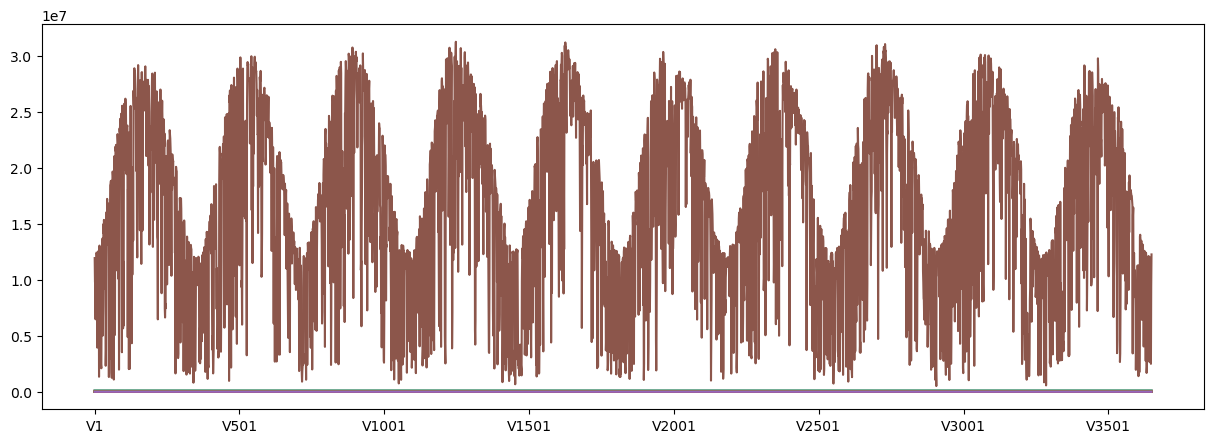

In [207]:
# In the plot, we can see that there are a lot of 0 values in the dataset
train_df.plot(legend=False, figsize=(15, 5))


In [208]:
result = train_df.eq(0.0).sum()/len(train_df)*100

# Select those columns with more than 30% of zeros
result = result[result > 30.0]
result = result.sort_values(ascending=False)
result


dswrf_s1_1    91.808219
uswrf_s1_1    90.767123
apcp_sf4_1    63.041096
apcp_sf5_1    61.041096
apcp_sf1_1    60.821918
apcp_sf2_1    59.890411
apcp_sf3_1    56.739726
tcdc_ea3_1    37.917808
tcdc_ea1_1    37.808219
tcdc_ea2_1    37.424658
tcdc_ea5_1    36.301370
tcdc_ea4_1    35.726027
dtype: float64

### Observations

As output of the previous cell, we can see that there exist a lot of zeros in the dataset, let's analize if those zeros make sense or not.

The variables with most ammount of zeros (>30%) are:

- **dswrf_s1_1**: Downward short-wave radiative flux average at the surface, at 12:00 UTC, normal to have a lot of zeros as it is not sunny at 12:00
- **uswrf_s1_1**: Upward short-wave radiation at the surface, at 12:00 UTC, normal to have a lot of zeros as it is not sunny at 12:00
- **apcp_s**: 3-Hour accumulated precipitation at the surface, as it is not raining every day, it is normal to have a lot of zeros
- **tcdc_ea**: Total cloud cover over the entire depth of the atmosphere, as it is not cloudy every day, it is normal to have a lot of zeros


First, lets start by assigning the zeros to NaNs. By doing this we can visualize the varibles that take more values other than zero.


In [209]:
disp_df_nan = train_df.replace(0.0, np.nan)


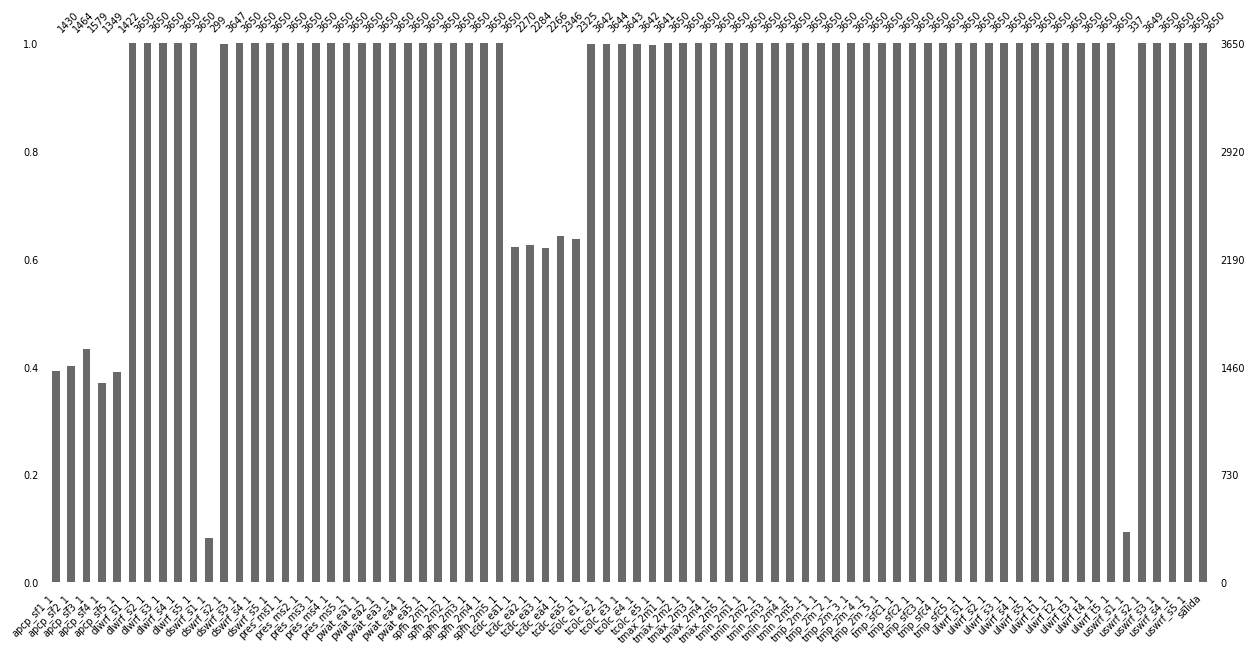

In [210]:
""" Plotting missing values """
# Sustitute 0.0 values with NaN and plot the name of the columns with missing values
# ? msno.bar is a simple visualization of nullity by column
msno.bar(disp_df_nan, labels=True, fontsize=7, figsize=(15, 7))

# Exporting image as png to ../data/img folder
plt.savefig("../data/img/missing_values_bar.png")


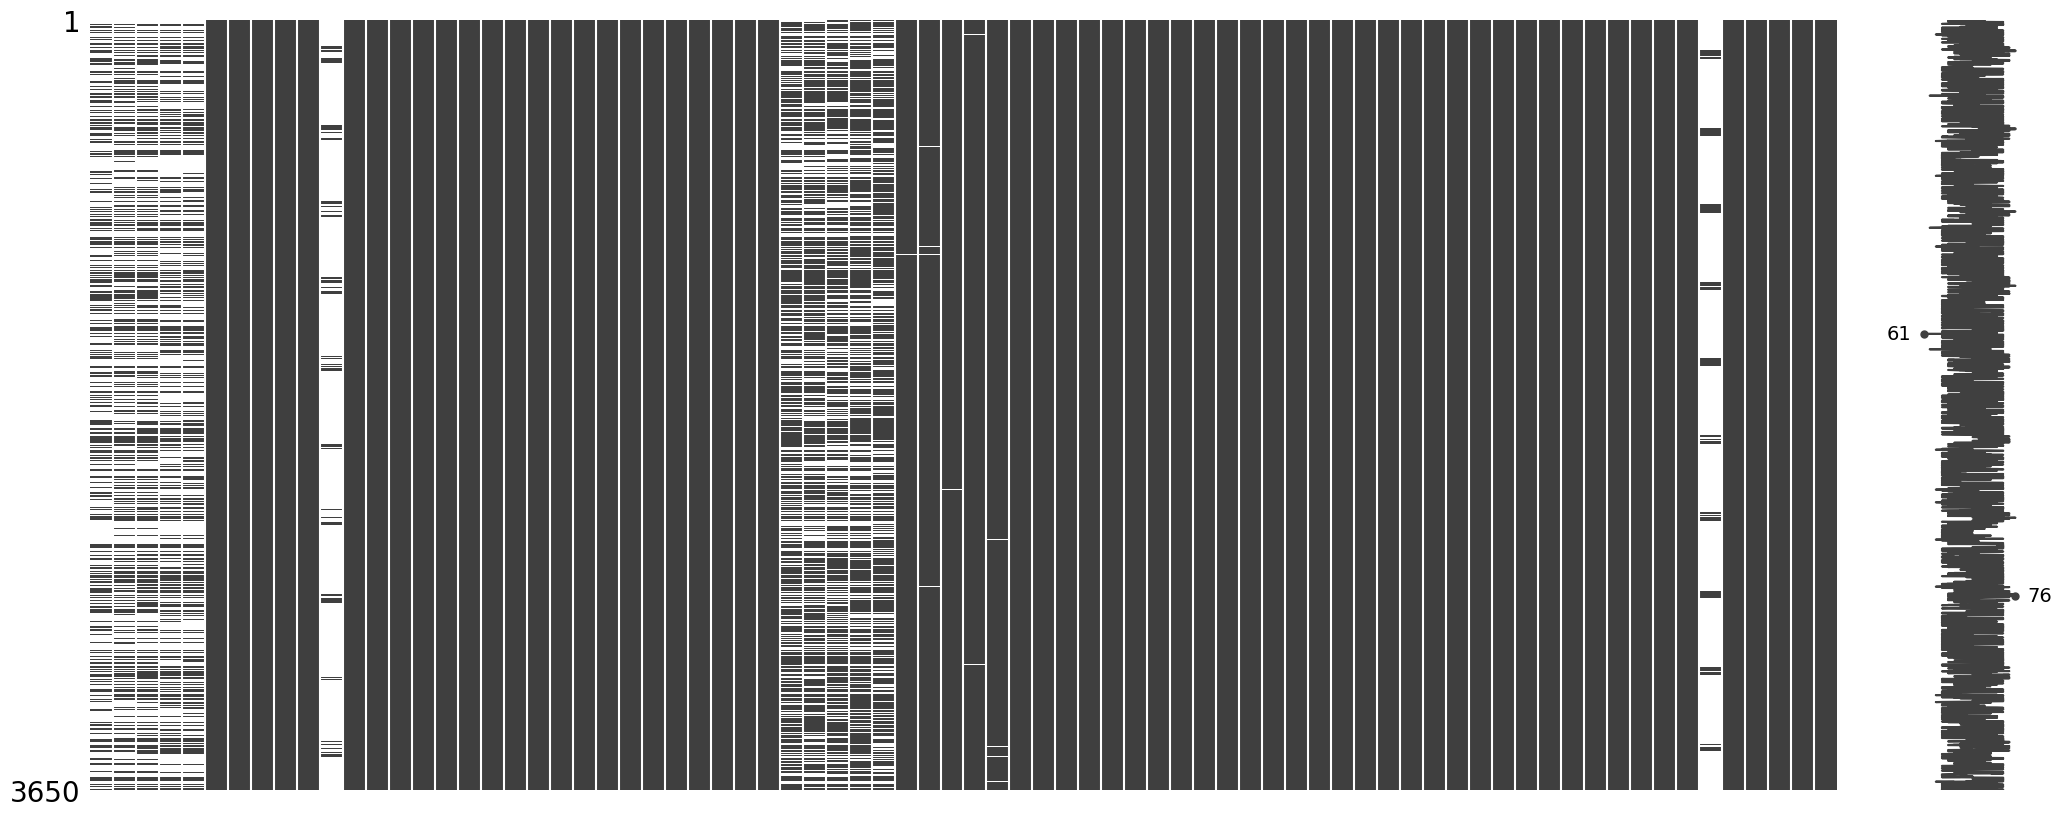

In [211]:
""" Plotting the missing values in a matrix """

# Fix ValueError: keyword grid_b is not recognized



# ? The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
msno.matrix(disp_df_nan)

# Exporting image as png to ../data/img folder
plt.savefig("../data/img/missing_values_matrix.png")


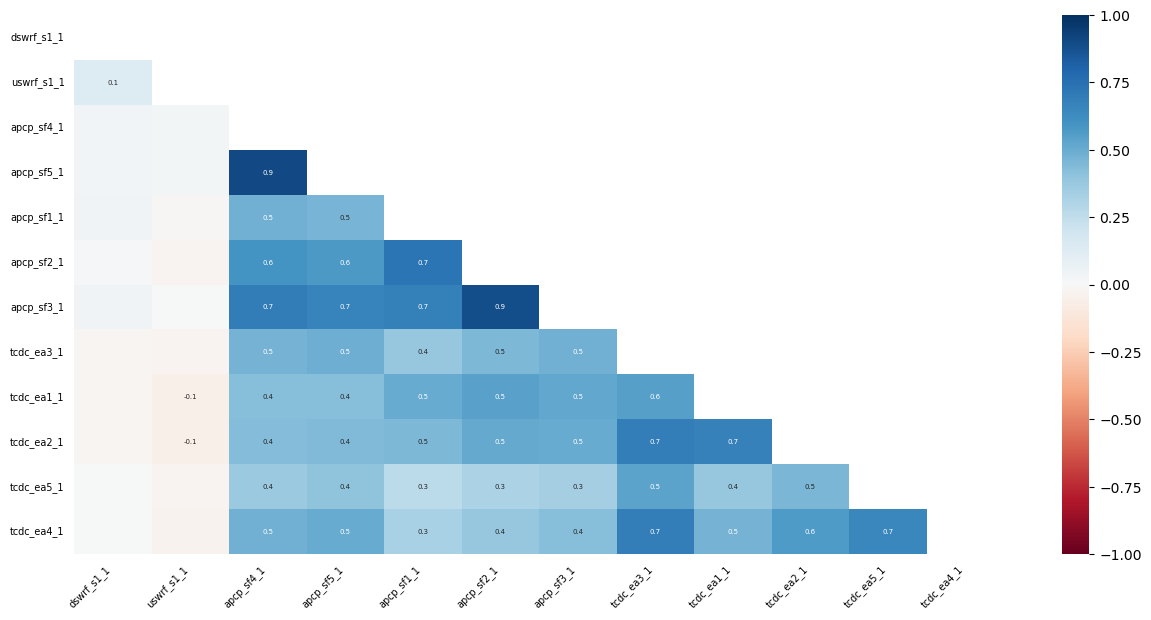

In [212]:
""" Plotting the missing values in a heatmap """
# As in a hetmap not every value is shown, we must delimit the values to the ones with more than 30% of missing values
result = disp_df.eq(0.0).sum()/len(disp_df)*100
result = result[result > 30.0] # Select those columns with more than 30% of zeros
result = result.sort_values(ascending=False)
result = result.index.tolist() # Convert to list
result

# ? The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(disp_df_nan[result], fontsize=7, figsize=(15, 7))

# Exporting image as png to ../data/img folder
plt.savefig("../data/img/missing_values_heatmap.png")


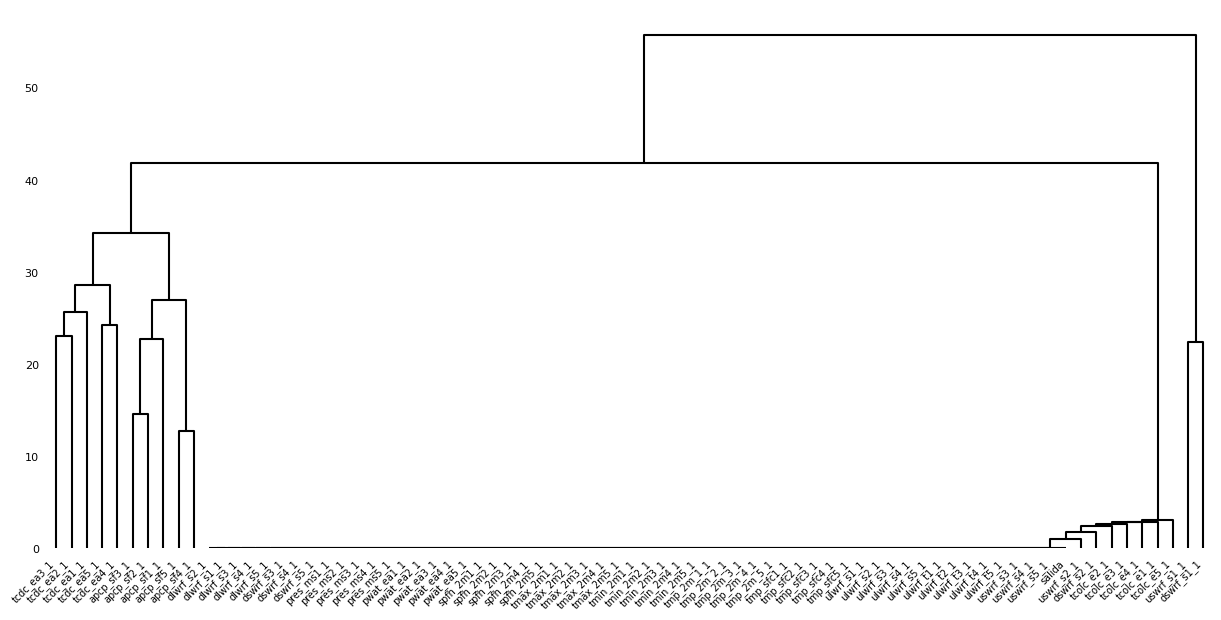

In [213]:
""" Plotting the dendrogram """

# ? The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:
msno.dendrogram(disp_df_nan, orientation="top",fontsize=7, figsize=(15, 7))

# Exporting image as png to ../data/img folder
plt.savefig("../data/img/missing_values_dendrogram.png")


### Conclusions
In this section, we have observe that there are no attibutes with 'Null' nor 'NaN' nor 'None' values. This indicated that at a first glance, the data is clean, at least of those datatypes.

In second place, we have observed that the attributes that we suspected could have an important number of missing values (represented by 0 instead of the previously mentioned), had instead valuable information, as we have proved along this section.<br>Since the data is clean and we have concluded there are no missing values, we do not need to complete them using a model or other methods, so we can move on to the next step, observing the outliers.

## 3.3. Outliers


With the objective of noticing the outliers on each attribute, we create a box-plot of each of the attributes 

In [214]:
list_of_attributes = train_df.columns.values.tolist()
#print(list_of_attributes)

In [215]:
# Boxplot with all attributes in the dataset
# sns.boxplot(data=train_df, orient="h")
# plt.show()

In [216]:
train_df.describe()

apcp_sf1_1   apcp_sf2_1   apcp_sf3_1   apcp_sf4_1   apcp_sf5_1  \
count  3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean      0.610222     0.251049     0.479367     0.279969     0.525625   
std       2.245850     0.994112     1.756408     1.120933     1.931408   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.114545     0.051818     0.121591     0.033636     0.090000   
max      34.428182    16.846364    28.399091    26.381818    36.875455   

        dlwrf_s1_1   dlwrf_s2_1   dlwrf_s3_1   dlwrf_s4_1   dlwrf_s5_1  \
count  3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean    316.590458   316.996492   324.225574   343.169304   342.582550   
std      56.119896    58.129352    58.941747    61.150202    61.027007   
min     158.971770   160.032903   165.524543   183.671312   186.342961   
25%     270.043573   267.583016   275.008281   292.786299   291.777096   
50%     319.801794   321.400251   328.456741   345.402277   345.107513   
75%     367.134144   370.342597   378.683015   399.545104   398.891589   
max     426.173970   427.486894   429.693146   455.566337   453.910406   

        dswrf_s1_1   dswrf_s2_1   dswrf_s3_1   dswrf_s4_1   dswrf_s5_1  \
count  3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean      0.074371   163.928966   376.718929   686.534869   508.429988   
std       0.305126   112.645372   159.486316   227.642854   193.753483   
min       0.000000     0.000000    20.000000    30.000000    20.000000   
25%       0.000000    52.727273   240.000000   525.454545   344.477273   
50%       0.000000   150.000000   384.318182   730.000000   525.636364   
75%       0.000000   264.454545   524.636364   893.636364   693.681818   
max       3.000000   381.818182   642.181818   990.000000   791.090909   

          pres_ms1_1     pres_ms2_1     pres_ms3_1     pres_ms4_1  \
count    3650.000000    3650.000000    3650.000000    3650.000000   
mean   101718.580471  101774.517076  101743.013770  101538.253073   
std       725.206610     731.500969     720.701217     699.477989   
min     99316.970881   99315.887074   99327.755682   99040.100852   
25%    101266.472124  101311.399680  101283.033381  101102.175426   
50%    101645.975852  101704.351207  101674.750000  101472.419389   
75%    102131.380504  102188.719283  102148.666726  101940.005327   
max    104688.396307  104856.285511  104693.185369  104244.932528   

          pres_ms5_1   pwat_ea1_1   pwat_ea2_1   pwat_ea3_1   pwat_ea4_1  \
count    3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean   101499.397514    21.394485    21.536129    22.127195    22.595594   
std       715.361146    12.256253    12.358856    12.583364    12.633154   
min     98830.153409     1.100000     1.314819     1.107352     1.142803   
25%    101049.033203    10.879000    10.718024    11.122964    11.558385   
50%    101425.127131    19.191209    19.163636    19.650000    20.290909   
75%    101919.873402    31.188882    31.471632    32.439831    33.103788   
max    104249.968040    60.327273    58.876881    59.915362    59.309182   

        pwat_ea5_1   spfh_2m1_1   spfh_2m2_1   spfh_2m3_1   spfh_2m4_1  \
count  3650.000000  3650.000000  3650.000000  3650.000000  3650.000000   
mean     22.384870     0.007844     0.008848     0.009356     0.009473   
std      12.401121     0.004398     0.005039     0.005175     0.005097   
min       1.201246     0.000462     0.000485     0.000451     0.000478   
25%      11.559638     0.003991     0.004229     0.004617     0.004736   
50%      20.194252     0.007246     0.008248     0.008909     0.009156   
75%      32.459132     0.011612     0.013523     0.014275     0.014169   
max      60.529133     0.018809     0.019533     0.020985     0.021932   

        spfh_2m5_1   tcdc_ea1_1  

In [217]:
train_df['apcp_sf1_1'].value_counts()

0.000000    2220
0.000909      54
0.001818      24
0.003636      19
0.002727      19
            ... 
2.356364       1
0.920000       1
0.048182       1
0.211818       1
1.363636       1
Name: apcp_sf1_1, Length: 1170, dtype: int64

Here, by plotting the boxplots and making the outliers (fliers) visible, we are able to see some outliers in the dataset.<br>
Take into account that the outliers are represented by the points outside the boxplot and they can be potentially wrong values or just values that are not usual in the dataset (ruido).

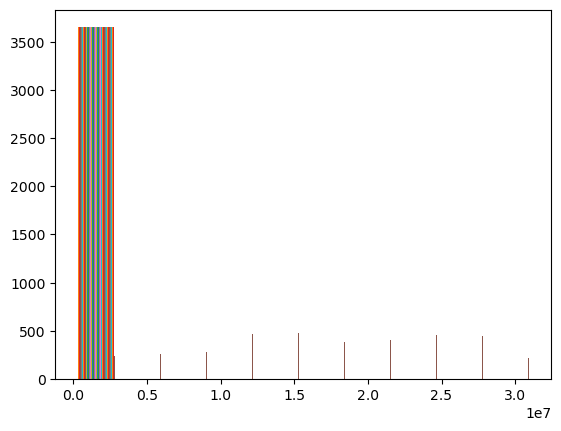

In [218]:
plt.hist(train_df)
plt.show()


['apcp_sf1_1 outliers', 693]...
['apcp_sf2_1 outliers', 674]...
['apcp_sf3_1 outliers', 677]...
['apcp_sf4_1 outliers', 761]...
['apcp_sf5_1 outliers', 709]...
['dswrf_s1_1 outliers', 299]...
['pres_ms1_1 outliers', 56]...
['pres_ms2_1 outliers', 55]...
['pres_ms3_1 outliers', 64]...
['pres_ms4_1 outliers', 68]...
['pres_ms5_1 outliers', 58]...
['tcdc_ea1_1 outliers', 514]...
['tcdc_ea2_1 outliers', 525]...
['tcdc_ea3_1 outliers', 575]...
['tcdc_ea4_1 outliers', 549]...
['tcdc_ea5_1 outliers', 559]...
['tcolc_e1_1 outliers', 513]...
['tcolc_e2_1 outliers', 523]...
['tcolc_e3_1 outliers', 575]...
['tcolc_e4_1 outliers', 555]...
['tcolc_e5_1 outliers', 560]...
['uswrf_s1_1 outliers', 337]...
['uswrf_s3_1 outliers', 3]...
['uswrf_s4_1 outliers', 31]...
['uswrf_s5_1 outliers', 9]...
Total number of atributes with outliers: 25 / 75


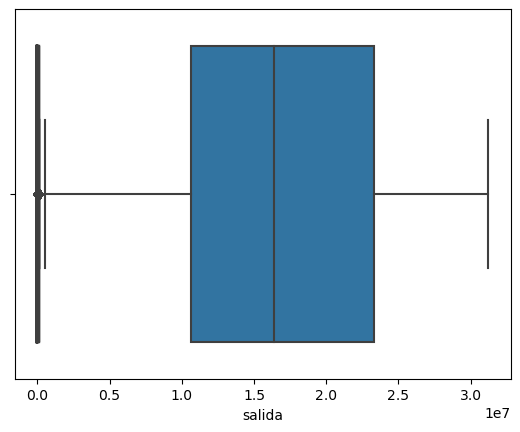

In [257]:
""" Plotting the boxplot for each attribute and getting the outliers of each attribute """
total_outliers = []
# * We iterate over the list of attributes
for attribute in list_of_attributes:
    # * sns.regplot(x=train_df[attribute], y=train_df['total'], fit_reg=False)
    sns.boxplot(data=train_df[attribute], x=train_df[attribute], orient="h")
    # * Use the command below to show each plot (small size for visualization sake)
    # sns.set(rc={'figure.figsize':(1,.5)})
    # plt.show()
    # * All the images are saved in the folder ../data/img/box-plot
    plt.savefig(f"../data/img/box-plot/{str(attribute)}.png")

    # We obtain the a list of outliers for each attribute
    list_of_outliers = train_df[attribute][train_df[attribute] > train_df[attribute].quantile(0.75) + 1.5*(train_df[attribute].quantile(0.75) - train_df[attribute].quantile(0.25))].tolist()
    outliers = [f'{attribute} outliers'] + [len(list_of_outliers)] + [list_of_outliers]
    # * In orde to print the total number of outliers for each attribute
    # print(f'{attribute} has {len(list_of_outliers)} outliers')
    # ! Data structure: [attribute, number of outliers, list of outliers]
    # print(outliers)
    total_outliers.append(outliers)

# print the first 2 elements of each element in the list -> [[atb, num],[atb, num],...]
num_atb_outliers = 0
for i in total_outliers:
    if i[1] != 0:
        num_atb_outliers += 1
        print(f"{i[0:2]}...")
        
# Number of outliers != 0 for each attribute
print(f"Total number of atributes with outliers: {num_atb_outliers} / {len(total_outliers)-1}")

We managed to create a list containing the name of the atribute, the number of outliers and the value of the outliers for each attribute, calculated by applying the IQR method.<br> This is relevant as we managed to create a 'total_outliers' variable that contains the list data structures of all the different outliers from all the attributes, so that it can be easily accessed in a future to remove the outliers from the dataset if needed for testing purposes.

As suspected, we can see that there are a lot of outliers in the dataset, therefore it is plausible that some of them are noise, thus possibly being removed in a future model in order to improve it.<br>Now, we need to analyze if they are the result of bad measurements or if they are significant data for the analysis.


Additionaly, as we will see later, this amount of outliers indicate us that using a Robust Scaler will be more appropriate than using a Standard Scaler, as the Robust Scaler is more robust to outliers than the Standard Scaler, thus being more appropriate for this dataset model.

In [220]:
""" Skewness """
# ? skewness: measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
train_df.skew().sort_values(ascending=False)

apcp_sf4_1    9.297678
apcp_sf2_1    7.610005
apcp_sf5_1    7.244491
apcp_sf3_1    7.241727
apcp_sf1_1    6.783553
                ...   
ulwrf_t1_1   -0.964701
ulwrf_t3_1   -0.989917
ulwrf_t2_1   -1.001763
ulwrf_t5_1   -1.071147
ulwrf_t4_1   -1.196425
Length: 76, dtype: float64

In [221]:
""" Kurtosis """
# ? kurtosis: measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
train_df.kurt().sort_values(ascending=False)

apcp_sf4_1    138.601323
apcp_sf2_1     79.535762
apcp_sf5_1     78.321580
apcp_sf3_1     72.498316
apcp_sf1_1     61.204708
                 ...    
uswrf_s2_1     -1.306893
spfh_2m2_1     -1.320499
spfh_2m5_1     -1.321073
dswrf_s2_1     -1.323864
spfh_2m3_1     -1.329847
Length: 76, dtype: float64

/tmp/ipykernel_3928/2851594757.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True, fit=st.norm)
/tmp/ipykernel_3928/2851594757.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True, fit=st.lognorm)


<Axes: title={'center': 'Log Normal'}, xlabel='apcp_sf4_1', ylabel='Density'>

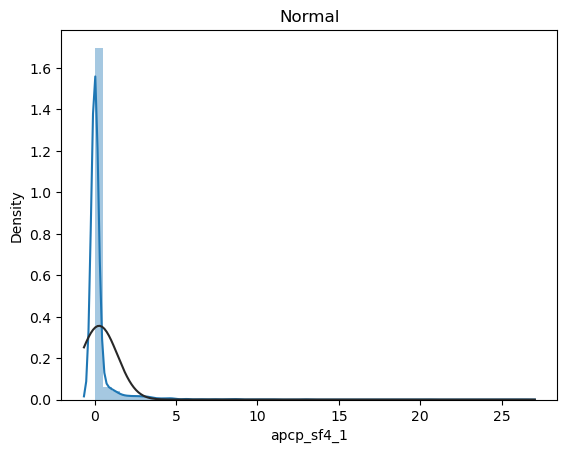

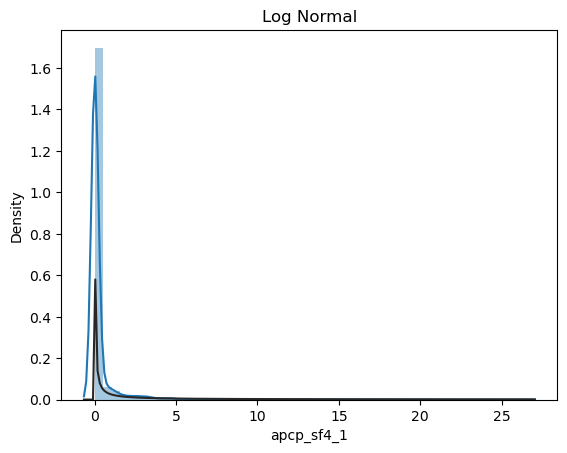

In [222]:
y = train_df['apcp_sf4_1']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=True, fit=st.norm)
plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=True, fit=st.lognorm)

/tmp/ipykernel_3928/3675943835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.skew(),color='blue',axlabel ='Skewness')


<Axes: xlabel='Skewness', ylabel='Density'>

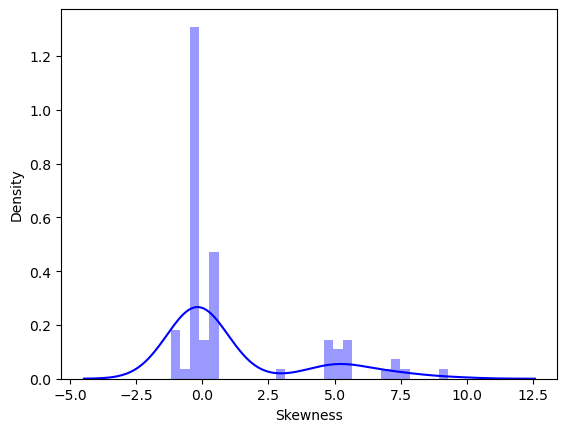

In [223]:
sns.distplot(train_df.skew(),color='blue',axlabel ='Skewness')

/tmp/ipykernel_3928/1886886254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


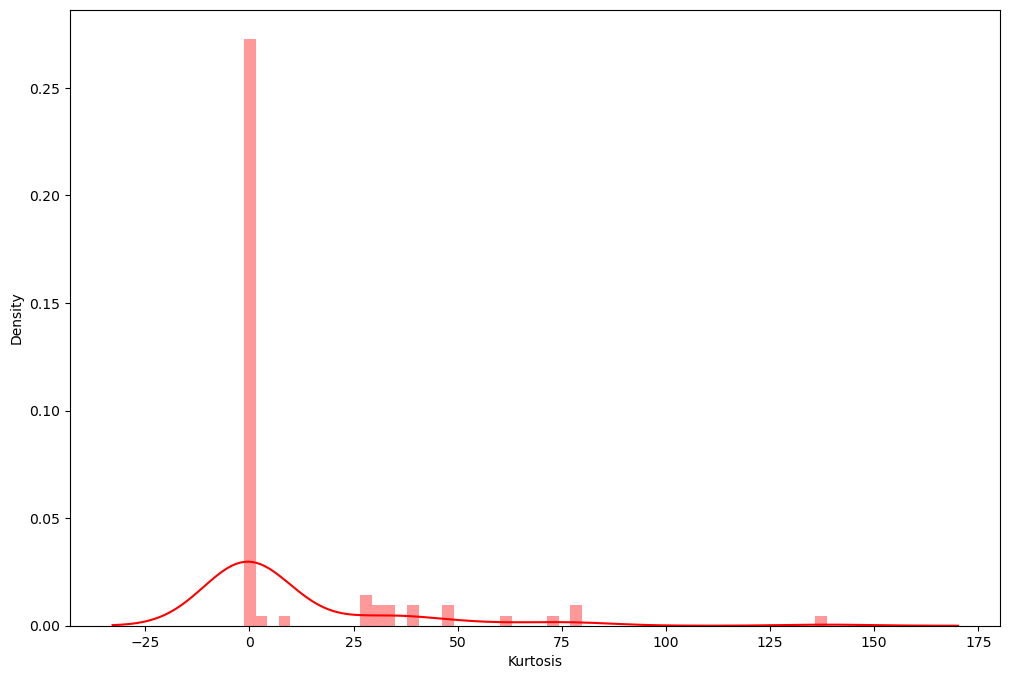

In [224]:
plt.figure(figsize = (12,8))
sns.distplot(train_df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

## 3.4. Correlation


In this section we are getting information about the correlation of the variables between them. This information is valuable in order to make good decisions when deleting redundant attributes. Also note we are getting information about the correlation between each attribute and the solution variable. This allows us to know the most relevant attributes, making the best decisions when creating the different models.  

In [225]:
correlation = train_df.corr()
correlation = abs(correlation)
print(correlation.shape)  # 76 x 76 matrix of correlation values

(76, 76)


### Getting the correlation matrix formatted into our own data structure
This is done for the sake of simplicity and to be able to visualize the correlation matrix in a more intuitive way.


In [226]:
correlation_list = []

for column in train_df.columns:
    correlation.loc[:, column] = abs(correlation.iloc[:, train_df.columns.get_loc(column)])
    mask = correlation.loc[:, column] > 0.95
    # print(correlation[column][mask].sort_values(ascending = False))
    
    # Translate the comment below to English: 
    # we add the correlation values to a list of lists, which contains the names of the correlated columns and their correlation index
    
    # The first segment adds the name of the column we are analyzing
    # The second segment adds the names of the columns correlated (except the column we are analyzing) > 0.95
    # The third segment adds the correlation index of the columns correlated (except the column we are analyzing) > 0.95
    # Second and third segment are added to the first segment as a list of lists
    
    # First we need to create a dictionary with the column names and their correlation values (except the column we are analyzing)
    dict = ({key: value for key, value in correlation.loc[column, mask].sort_values(ascending = False).iloc[1:].to_dict().items()})
    # print (dict)
    
    # Then we create a list of lists with the column names and their correlation values from the dictionary created above
    corr_list = [[key] + [value] for key, value in dict.items()]
    # Finally we add the name of the column we are analyzing to the list of lists created above as the first element of the list (str)
    corr_list.insert(0, ["Columna: " + column])
    
    # ! Data structure: [[columna, [columna correlada 1, indice de correlacion], [columna correlada 2, indice de correlacion], ...], ...] 
    print(corr_list)
    
    correlation_list += [corr_list]
print(correlation_list)

[['Columna: apcp_sf1_1']]
[['Columna: apcp_sf2_1']]
[['Columna: apcp_sf3_1']]
[['Columna: apcp_sf4_1']]
[['Columna: apcp_sf5_1']]
[['Columna: dlwrf_s1_1'], ['dlwrf_s2_1', 0.9650067922254768], ['dlwrf_s3_1', 0.9547817730760655]]
[['Columna: dlwrf_s2_1'], ['dlwrf_s3_1', 0.993701215706055], ['dlwrf_s1_1', 0.9650067922254768]]
[['Columna: dlwrf_s3_1'], ['dlwrf_s2_1', 0.993701215706055], ['dlwrf_s4_1', 0.9659874690575408], ['dlwrf_s5_1', 0.9552712673845433], ['dlwrf_s1_1', 0.9547817730760655]]
[['Columna: dlwrf_s4_1'], ['dlwrf_s5_1', 0.9969222914149775], ['dlwrf_s3_1', 0.9659874690575408]]
[['Columna: dlwrf_s5_1'], ['dlwrf_s4_1', 0.9969222914149775], ['dlwrf_s3_1', 0.9552712673845433]]
[['Columna: dswrf_s1_1']]
[['Columna: dswrf_s2_1'], ['uswrf_s2_1', 0.9911709851006711], ['dswrf_s3_1', 0.9503896354343679]]
[['Columna: dswrf_s3_1'], ['uswrf_s2_1', 0.9591814530708258], ['dswrf_s2_1', 0.9503896354343679]]
[['Columna: dswrf_s4_1'], ['dswrf_s5_1', 0.982758557897581]]
[['Columna: dswrf_s5_1'], [

### Correlation Heat Map

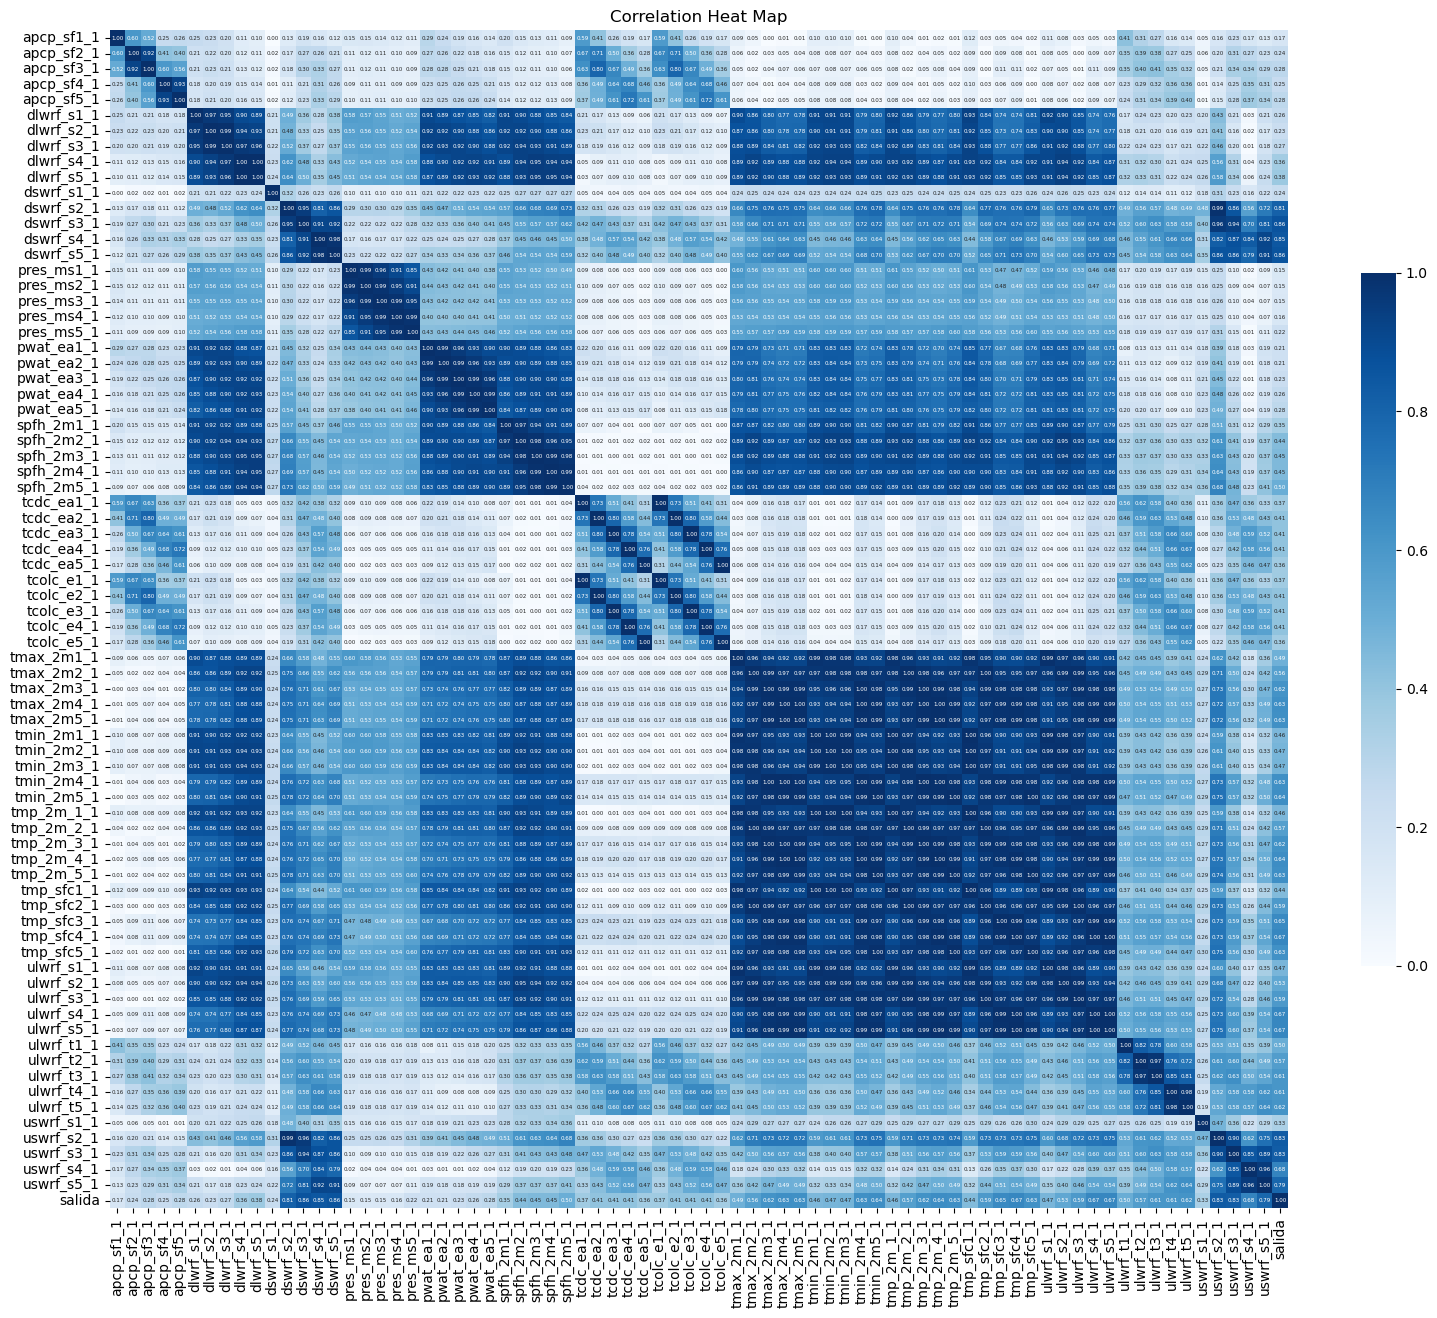

In [227]:
""" seaborne Correlation Heat Map """
# It needs to show all the columns
fig, ax = plt.subplots(figsize=(19,18))

plt.title('Correlation Heat Map',y=1)
# We use blue color scale because it is easier to see the annotations and the correlation values
sns.heatmap(correlation, square=True, cmap='Blues', annot=True, fmt='.2f', annot_kws={'size': 4}, cbar_kws={"shrink": .5}, vmin=0.0, vmax=1)
# We can modify vmax=0.95 in order to get same color scale for values with more than 0.95 correlation
# Note: it delays around 15 seconds as it needs to plot a 76*76 matrix with its 5766 correlation values

# Exporting image as png to ../data/img folder - easier to visualize the annotations, better resolution
plt.savefig("../data/img/correlation_heatmap.png", dpi=200)


Once obtained the most correlated columns of the dataset, we can plot them and visualize their correlation.

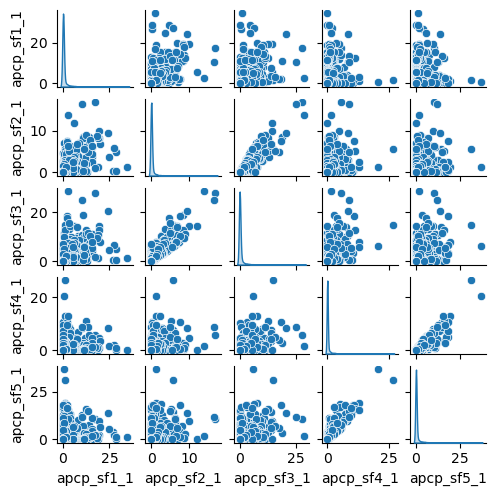

In [228]:
# 1
columns = ['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1','apcp_sf4_1', 'apcp_sf5_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()


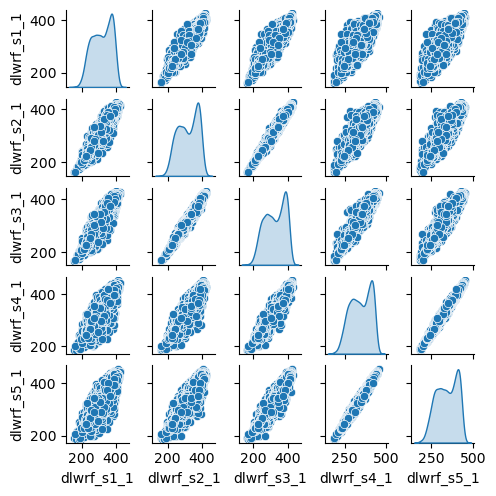

In [229]:
# 2
columns = [ 'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()


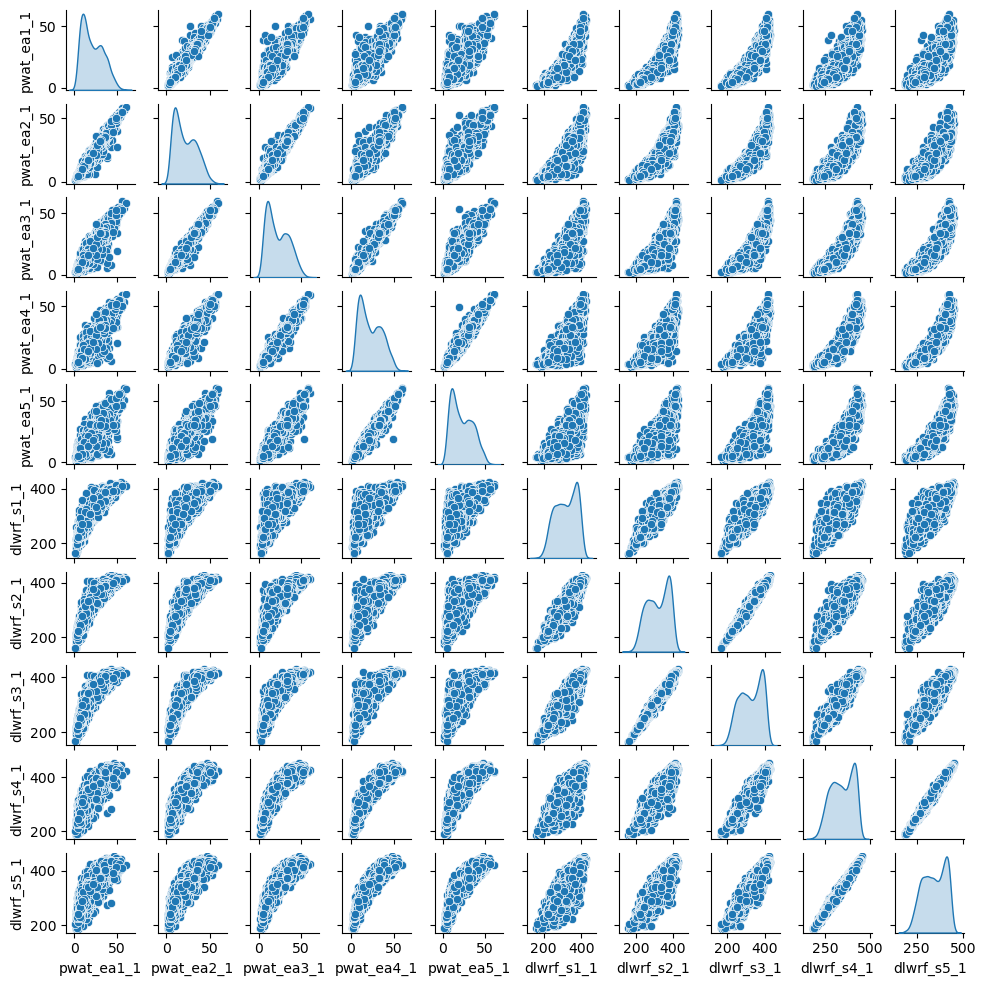

In [230]:
# 3
columns = ['pwat_ea1_1', 'pwat_ea2_1','pwat_ea3_1','pwat_ea4_1','pwat_ea5_1', 'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()


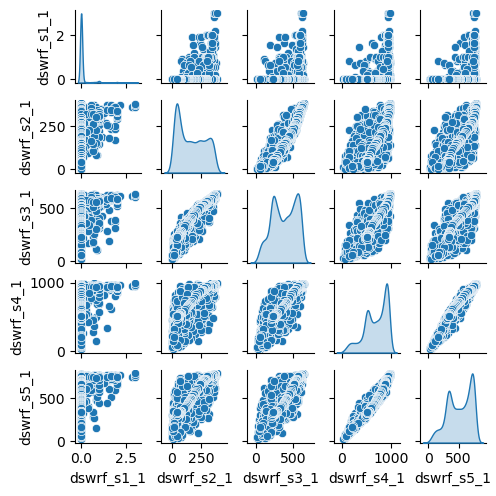

In [231]:
# 4
columns = ['dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()


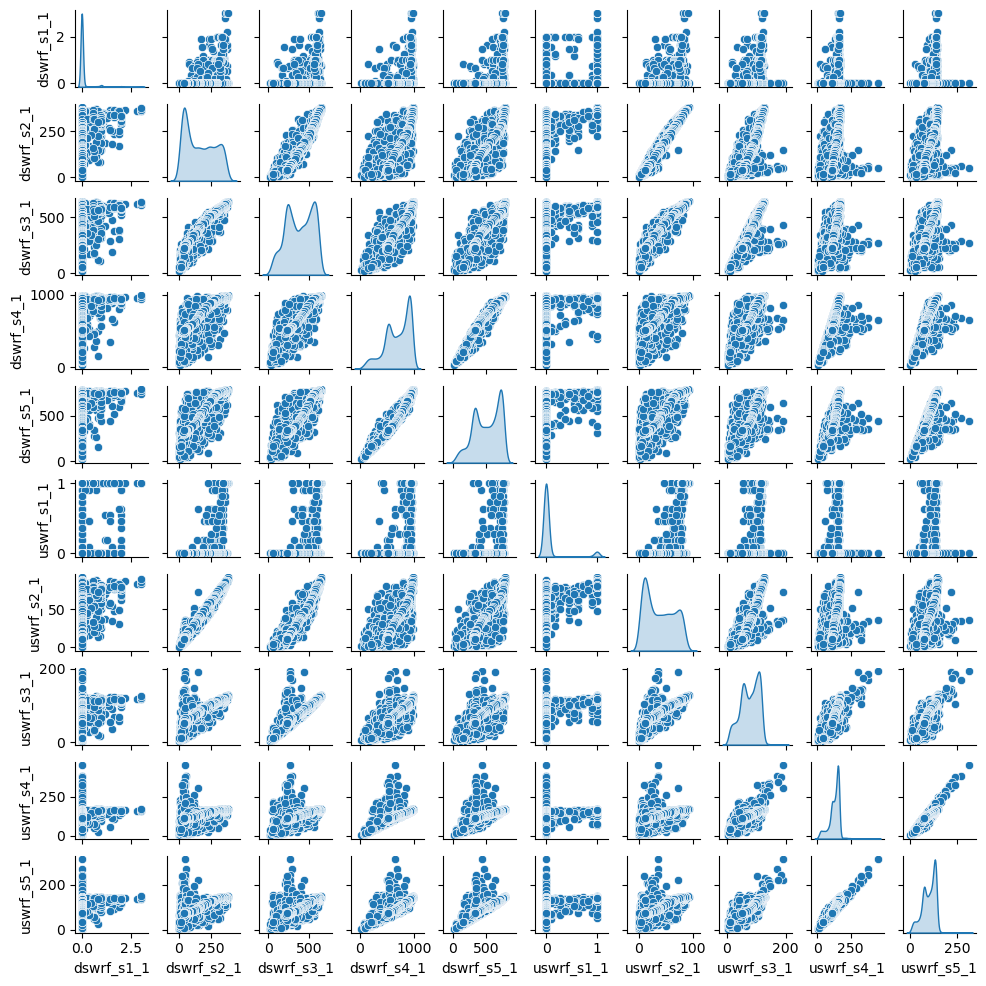

In [232]:
# 5
columns = ['dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1', 'uswrf_s1_1', 'uswrf_s2_1', 'uswrf_s3_1', 'uswrf_s4_1', 'uswrf_s5_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()


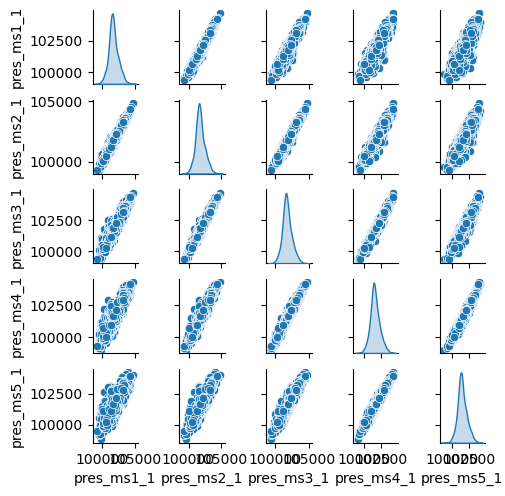

In [233]:
# 6
columns = ['pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()

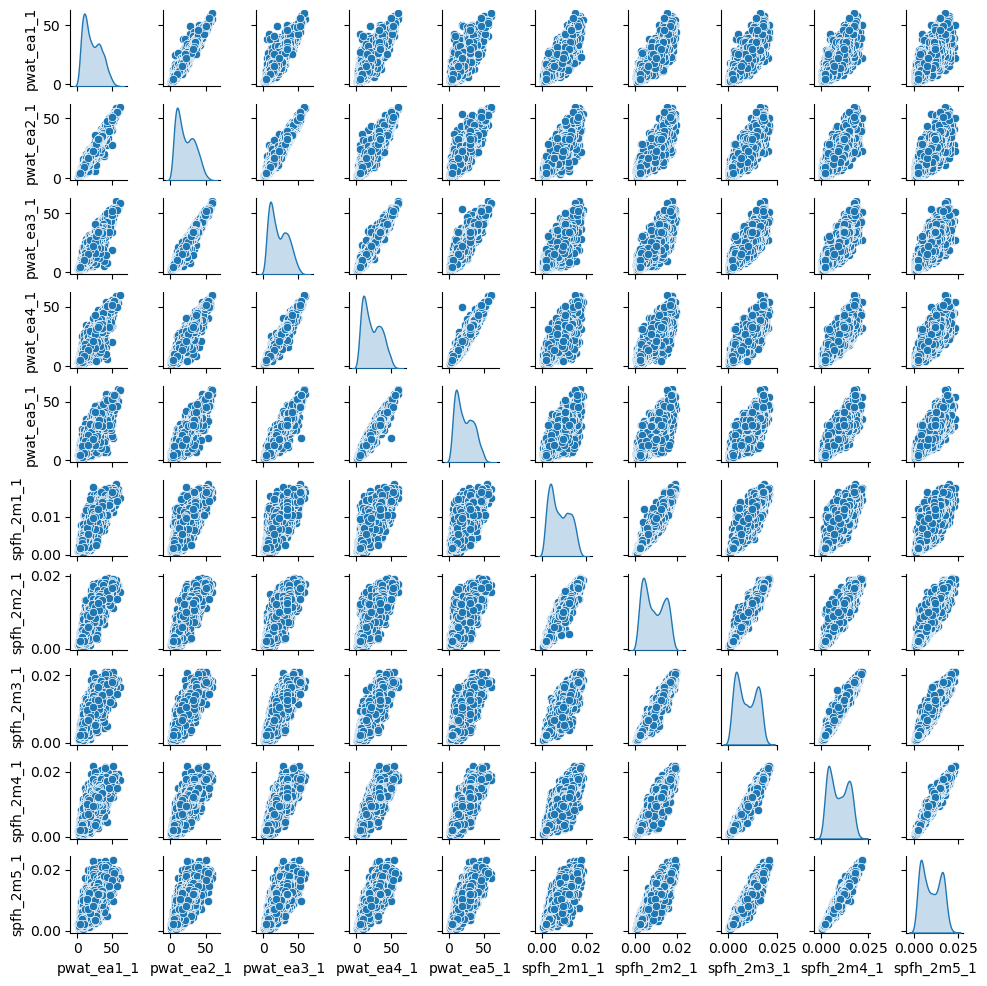

In [234]:
# 7
columns = ['pwat_ea1_1', 'pwat_ea2_1','pwat_ea3_1','pwat_ea4_1','pwat_ea5_1', 'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()


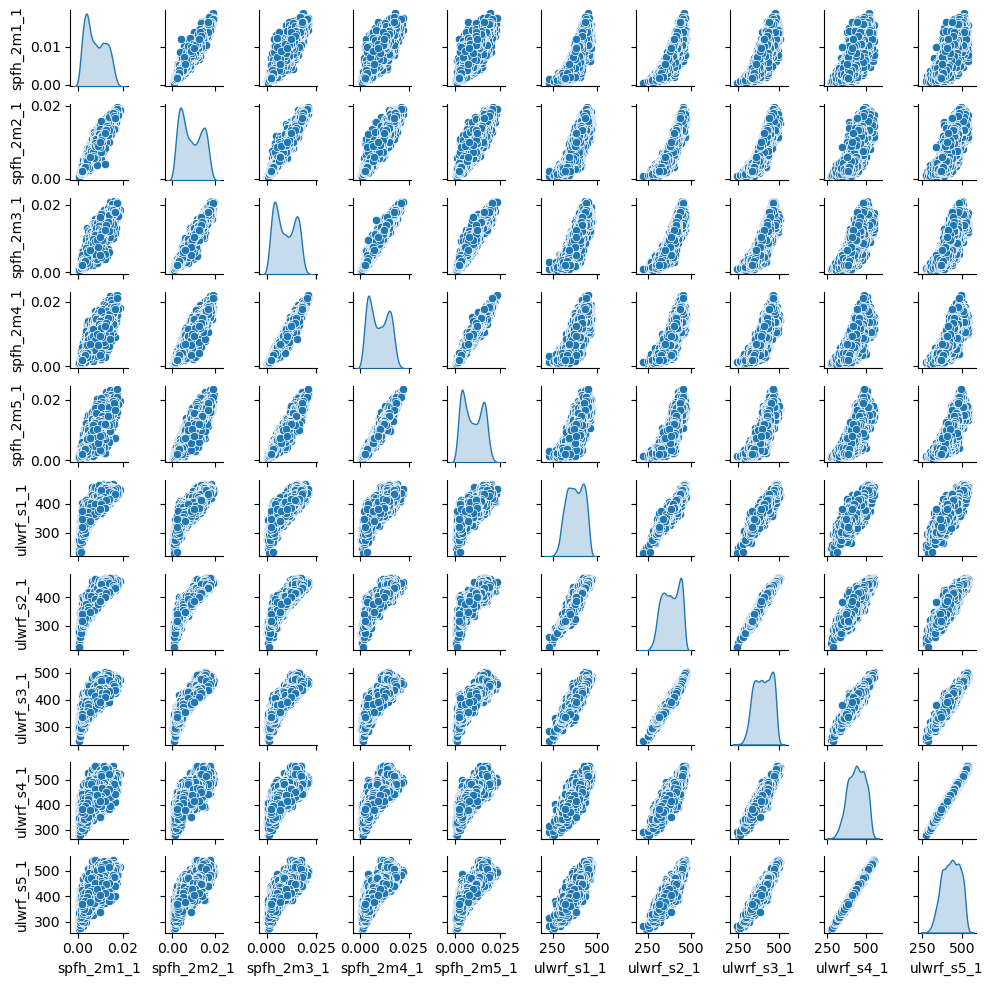

In [235]:
# 8
columns = ['spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1','ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s4_1', 'ulwrf_s5_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()


In [236]:
# 9
# columns = ['tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1','tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1','ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s4_1', 'ulwrf_s5_1']

# sns.pairplot(train_df[columns], height = 1 ,kind ='scatter',diag_kind='kde')
# plt.show()

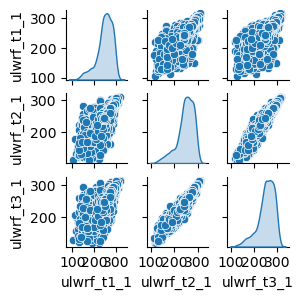

In [237]:
# 10
columns = ['ulwrf_t1_1', 'ulwrf_t2_1', 'ulwrf_t3_1']

sns.pairplot(train_df[columns], height = 1, kind ='scatter',diag_kind='kde')
plt.show()


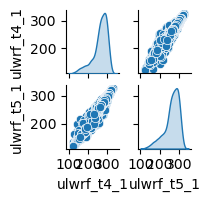

In [238]:
# 11
columns = ['ulwrf_t4_1', 'ulwrf_t5_1', ]

sns.pairplot(train_df[columns], height = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


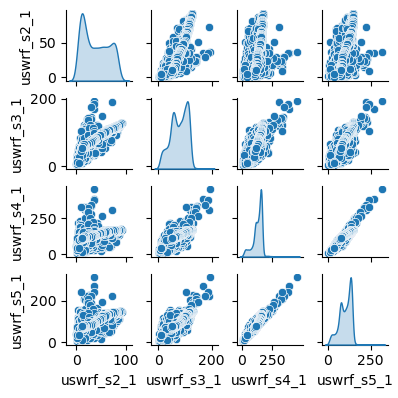

In [239]:
# 12
columns = ['uswrf_s2_1', 'uswrf_s3_1', 'uswrf_s4_1', 'uswrf_s5_1']

sns.pairplot(train_df[columns], height = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


As we can observe in the graphs above, the most correlated variables present a linear relationship between them. This shows as a diagonal in the graph, since both variables grow at the same time. 

# 4. Train-Test division 

Since we are working with a time dependent data, we need to avoid mixing it. Also, we are required to add the first 10 years of data to the train set and the last 2 years to the test set. This means we are assigning a 83.333333 of the data to train and a 16.66666666 to test.

**Note**: This division was already done before the EDA. We overwrite it to start from a clean state.

Note: `iloc` is useful when we want to split data based on the index or other criteria, while `train_test_split` is useful when wanting to randomly split data into training and testing subsets.<br>
Therefore, we will use `iloc` to split the data into train and test sets as we are dealing with time dependent data.

In [240]:
import time
import matplotlib.pyplot as plt 

# Import the metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.pipeline import Pipeline

# As we have noted during the EDA, for this dataset full of outliers, its preferable to use the RobustScaler
# Although this wont make a huge difference
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, GridSearchCV


## 4.1. Train-Test split

In [241]:
""" Train Test Split (time series) """

np.random.seed(10)

# * Make a copy of the dataframe (as Padas dataframe is mutable, therefore uses a reference)
disp_df_copy = disp_df.copy()

# print(disp_df)
# print(disp_df_copy)

# Now we make the train_x, train_y, test_x, test_y splits taking into account the time series
# Note: the time series is ordered by date, therefore we need to split the data in a way that the train data is before the test data
# Note: the 10 first years are used for training and the last two years for testing
# Note: this is done because if not, we will be predicting the past from the future, which leads to errors and overfitting (data leakage) in the model

# * Calculate the number of rows for training and testing
num_rows = disp_df_copy.shape[0]
num_train_rows = int(num_rows * 10/12)  # 10 first years for training, 2 last years for testing

# * Split the data into train and test dataframes (using iloc instead of train_test_split as it picks random rows)
train_df = disp_df_copy.iloc[:num_train_rows, :]  # train contains the first 10 years of rows
test_df = disp_df_copy.iloc[num_train_rows:, :] # test contains the last 2 years of rows

# Print the number of rows for each dataframe
print(f"Number of rows for training: {train_df.shape[0]}")
print(f"Number of rows for testing: {test_df.shape[0]}")

# Print the dataframes
# print(train_df), print(test_df)

# * Separate the input features and target variable for training and testing
X_train = train_df.drop('salida', axis=1)   # This is the input features for training
y_train = train_df['salida']                # This is the target variable for training
X_test = test_df.drop('salida', axis=1)     # This is the input features for testing
y_test = test_df['salida']                  # This is the target variable for testing

# Print the shapes of the dataframes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Number of rows for training: 3650
Number of rows for testing: 730
(3650, 75) (3650,) (730, 75) (730,)


## 4.2. Train-Test RMSE and MAE function

In [242]:
np.random.seed(10)

def train_and_test(model, X_train, y_train, X_test, y_test):
    model.fit(X=X_train,y=y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # RMSE
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    
    # MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    print(f"Results of the best estimator of {model.__class__.__name__}")
    print(f"RMSE train: {rmse_train:.2f}", f"RMSE test: {rmse_test:.2f}", sep='\t')
    print(f"MAE train: {mae_train:.2f}", f"MAE test: {mae_test:.2f}", sep='\t')
    
    plt.plot(X_train.iloc[:,[0]], y_train, '.', label='train')
    plt.plot(X_train.iloc[:,[0]], y_train_pred, 'r.', label='train pred')
    plt.legend()
    plt.show()
    
    return [rmse_train, rmse_test, mae_train, mae_test]

## 4.3. Print model results

In [243]:
def print_results(name, model, score, time):
    print("---------------------------------------------------")
    print(f"{name} best model is:\n\n{model}")
    print("\nParameters:", model.best_params_)
    print(f"\nPerformance: RMSE train: {score[0]}", f"RMSE test: {score[1]}", f"MAE train: {score[2]}", f"MAE test: {score[3]}", sep=' | ')
    print(f"Execution time: {time}s")
    

# 5. Basic methods:

We need to divide the train set using train-test-split in order to simulate the cross validation to get the best hiperparameters. test_size=0.1666666666

In [244]:
# Two dictionaries to store the results of the models
results, times = {}, {}

## 5.1. KNN


In [245]:
from sklearn.neighbors import KNeighborsRegressor


### 5.1.1. KNN - Predefined parameters
The KNN predefinded hyperparameters are the following: 

Results of the best estimator of Pipeline
RMSE train: 2995411.40	RMSE test: 3669004.35
MAE train: 2105354.33	MAE test: 2589913.23


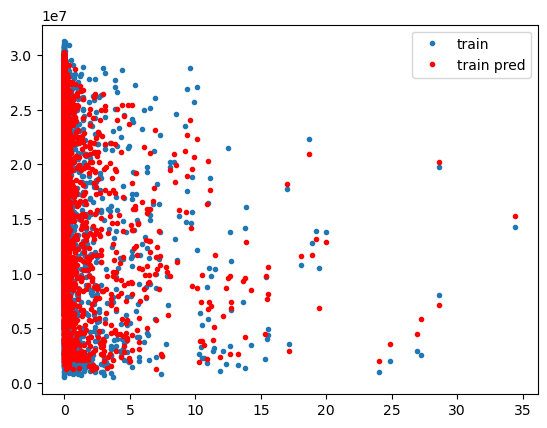

---------------------------------------------------
KNN PREDEFINED PARAMETERS best model is:

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__metric': ['minkowski'],
                         'model__n_neighbors': [5],
                         'model__weights': ['uniform']},
             scoring='neg_mean_absolute_error')

Parameters: {'model__metric': 'minkowski', 'model__n_neighbors': 5, 'model__weights': 'uniform'}

Performance: RMSE train: 2995411.3954362 | RMSE test: 3669004.351737694 | MAE train: 2105354.3342465754 | MAE test: 2589913.2328767125
Execution time: 0.18954920768737793s


In [246]:
np.random.seed(10)
n_splits = 5

# Using a pipeline to scale the data and then apply the model
pipeline = Pipeline([
    ('scale', StandardScaler()),
    # ('select', SelectKBest(f_regression)),
    ('model', KNeighborsRegressor())
])

param_grid = {
    'model__n_neighbors': [5],
    'model__weights': ['uniform'],
    'model__metric': ['minkowski'],
    # 'select__k': list(range(1, X_train.shape[1]+1))
}

regr = GridSearchCV(pipeline, 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=TimeSeriesSplit(n_splits),  # We use TimeSeriesSplit to split the data in folds without losing the temporal order
                        )

start_time = time.time()
regr.fit(X=X_train,y=y_train)
end_time = time.time()

total_time = end_time - start_time

score = train_and_test(regr.best_estimator_, X_train, y_train, X_test, y_test) # We train and test the model another time to get the final score (with the best parameters)

results['KNN_pred'] = score
times['KNN_pred'] = total_time

print_results("KNN PREDEFINED PARAMETERS", regr, score, total_time)

###  5.1.2. KNN - Selected parameters

Results of the best estimator of Pipeline
RMSE train: 3386909.05	RMSE test: 3394685.60
MAE train: 2410845.29	MAE test: 2420543.42


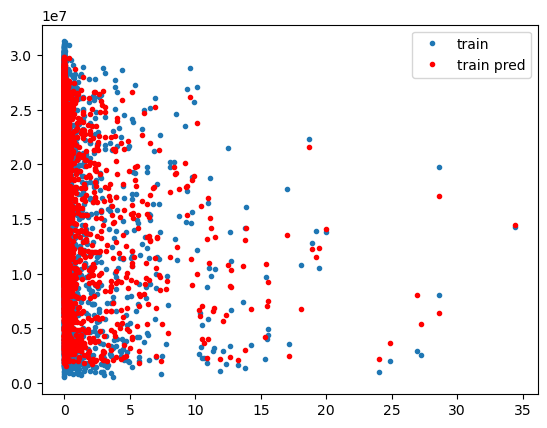

---------------------------------------------------
KNN SELECTED PARAMETERS best model is:

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                             ('select',
                                              SelectKBest(score_func=<function f_regression at 0x7feb48c353f0>)),
                                             ('model', KNeighborsRegressor())]),
                   n_iter=15,
                   param_distributions={'model__metric': ['euclidean',
                                                          'manhattan',
                                                          'minkowski',
                                                          'chebyshev'],
                                        'model__n_neighbors': [1, 3, 5, 7, 9,
                                                               11, 13, 15, 17,
                 

In [247]:
np.random.seed(10)
budget = 15
n_splits = 5

pipeline = Pipeline([
    ('scaler', RobustScaler()), 
    ('select', SelectKBest(f_regression)),
    ('model', KNeighborsRegressor())
])

param_grid = {'model__n_neighbors': list(range(1, 50, 2)),
              'model__weights': ['uniform', 'distance'],
              'model__metric': ['euclidean', 'manhattan', 'minkowski','chebyshev'],
              'select__k': list(range(1, X_train.shape[1]+1))
              }

regr = RandomizedSearchCV(pipeline, 
                         param_grid,
                         scoring='neg_mean_absolute_error', 
                         cv=TimeSeriesSplit(n_splits), # TimeSeriesSplit to split the data in folds without losing the temporal order
                         n_iter=budget
                        )

start_time = time.time()
regr.fit(X=X_train,y=y_train)
end_time = time.time()

total_time = end_time - start_time

score = train_and_test(regr.best_estimator_, X_train, y_train, X_test, y_test) # We train and test the model another time to get the final score (with the best parameters)

results['KNN_select'] = score
times['KNN_select'] = total_time

print_results("KNN SELECTED PARAMETERS", regr, score, total_time)

## 5.2 Regression Trees

In [248]:
from sklearn.tree import DecisionTreeRegressor


### 5.2.1. Regression Trees - Predefined parameters

Results of the best estimator of Pipeline
RMSE train: 0.00	RMSE test: 4413372.50
MAE train: 0.00	MAE test: 3136761.37


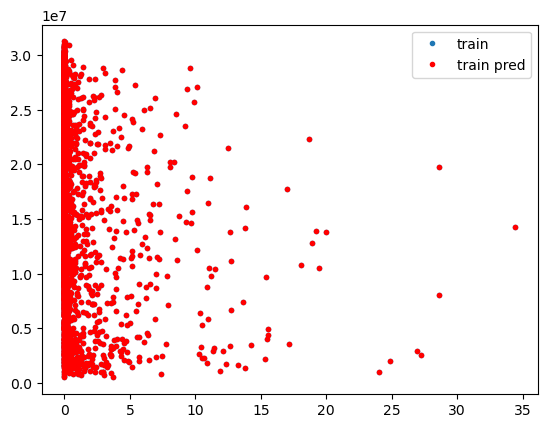

---------------------------------------------------
REGRESSION TREES PREDEFINED PARAMETERS best model is:

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('model', DecisionTreeRegressor())]),
             param_grid={'model__criterion': ['squared_error'],
                         'model__min_samples_split': [2],
                         'model__splitter': ['best']},
             scoring='neg_mean_absolute_error')

Parameters: {'model__criterion': 'squared_error', 'model__min_samples_split': 2, 'model__splitter': 'best'}

Performance: RMSE train: 0.0 | RMSE test: 4413372.497795917 | MAE train: 0.0 | MAE test: 3136761.3698630137
Execution time: 0.6608903408050537s


In [249]:
np.random.seed(10)
n_splits = 5

pipeline = Pipeline([
    # ('select', SelectKBest(f_regression)),
    ('model', DecisionTreeRegressor())
])

param_grid = {'model__criterion' : ["squared_error"],
              'model__splitter' : ["best"],              
              'model__min_samples_split' : [2], }
            #   'select__k': list(range(1, X_train.shape[1]+1))}

# We use TimeSeriesSplit to split the data in folds without losing the temporal order
regr = GridSearchCV(     pipeline, 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=TimeSeriesSplit(n_splits), 
                        )

start_time = time.time()
regr.fit(X=X_train,y=y_train)
end_time = time.time()

total_time = end_time - start_time

score = train_and_test(regr.best_estimator_, X_train, y_train, X_test, y_test) # We train and test the model another time to get the final score (with the best parameters)

results['RegTrees_pred'] = score
times['RegTrees_pred'] = total_time

print_results("REGRESSION TREES PREDEFINED PARAMETERS", regr, score, total_time)

### 5.2.2. Regression Trees - Selected parameters

Results of the best estimator of Pipeline
RMSE train: 3483153.61	RMSE test: 3691730.92
MAE train: 2250097.48	MAE test: 2489240.55


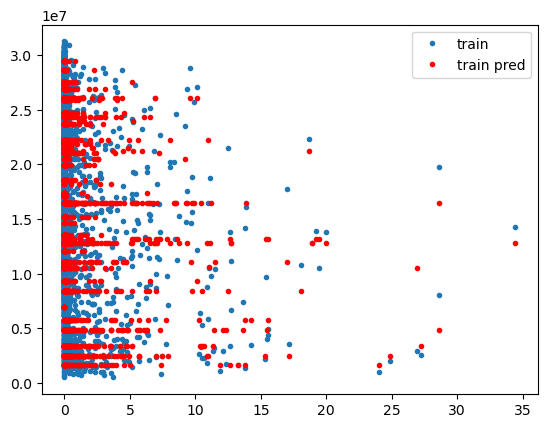

---------------------------------------------------
REGRESSION TREES SELECTED PARAMETERS best model is:

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('select',
                                              SelectKBest(score_func=<function f_regression at 0x7feb48c353f0>)),
                                             ('model',
                                              DecisionTreeRegressor())]),
                   n_iter=15,
                   param_distributions={'model__criterion': ['absolute_error',
                                                             'squared_error'],
                                        'model__max_depth': [5, 10, 15, 20, 25,
                                                             30, 35, 40, 45, 50,
                                                             55],
                                        'model__max_features': ['sqrt', 'log2',
      

In [250]:
np.random.seed(10)
budget = 15
n_splits = 5

pipeline = Pipeline([
    ('select', SelectKBest(f_regression)),
    ('model', DecisionTreeRegressor())
])

param_grid = {'model__criterion' : ["absolute_error", "squared_error"],
              'model__splitter' : ["best", "random"],
              'model__max_depth' : list(range(5, 60, 5)),
              'model__min_samples_split' : list(range(5, 200)),
              'model__max_features' : ["sqrt", "log2", None], 
              'select__k': list(range(1, X_train.shape[1]+1))}

# We use TimeSeriesSplit to split the data in folds without losing the temporal order
regr = RandomizedSearchCV(pipeline, 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=TimeSeriesSplit(n_splits),
                         n_iter=budget
)

start_time = time.time()                      
regr.fit(X=X_train,y=y_train)
end_time = time.time()

total_time =  end_time - start_time

score = train_and_test(regr.best_estimator_, X_train, y_train, X_test, y_test) # We train and test the model another time to get the final score (with the best parameters)

results['RegTrees_select'] = score
times['RegTrees_select'] = total_time

print_results("REGRESSION TREES SELECTED PARAMETERS", regr, score, total_time)


Note: if we add the selection of parameters, we get a worse result, although the tran and test is way faster.

## 5.3 Linnear regression

In [251]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


### 5.3.1. Linear regression - Predefined parameters

Results of the best estimator of Pipeline
RMSE train: 3254352.60	RMSE test: 3103586.45
MAE train: 2321647.06	MAE test: 2242422.37


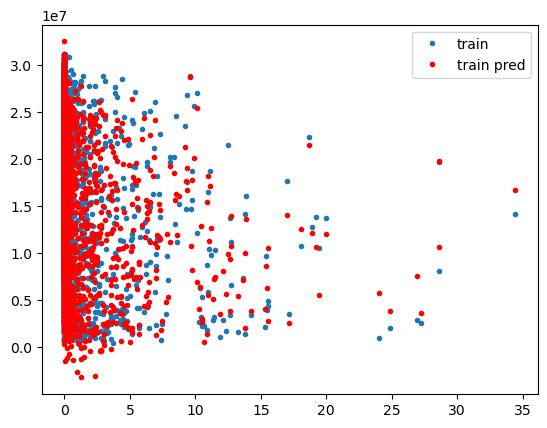

---------------------------------------------------
LINEAR REGRESSION PREDEFINED PARAMETERS best model is:

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True]},
             scoring='neg_mean_absolute_error')

Parameters: {'model__fit_intercept': True}

Performance: RMSE train: 3254352.6036904687 | RMSE test: 3103586.448673973 | MAE train: 2321647.059703229 | MAE test: 2242422.3671082137
Execution time: 0.1005866527557373s


In [252]:
np.random.seed(10)
n_splits=5

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    # ('select', SelectKBest(f_regression)),
    ('model', LinearRegression())
])

param_grid = {'model__fit_intercept': [True], }
            #   'select__k': list(range(1, X_train.shape[1]+1))}

regr = GridSearchCV(pipeline,
                    param_grid,
                    scoring='neg_mean_absolute_error',
                    cv=TimeSeriesSplit(n_splits)
                    )


start_time = time.time()
regr.fit(X=X_train, y=y_train)
end_time = time.time()

total_time = end_time - start_time

score = train_and_test(regr.best_estimator_, X_train, y_train, X_test, y_test) # We train and test the model another time to get the final score (with the best parameters)

results['LinearReg_pred'] = score
times['LinearReg_pred'] = total_time

print_results("LINEAR REGRESSION PREDEFINED PARAMETERS", regr, score, total_time)


With the select params, the train test is way slower.

### 5.3.2. Linear regression - Selected parameters

Model: -2723823.0627315757
{'select__k': 41, 'model__alpha': 0.01}
Results of the best estimator of Pipeline
RMSE train: 3767140.00	RMSE test: 3659527.62
MAE train: 2747472.88	MAE test: 2583859.90


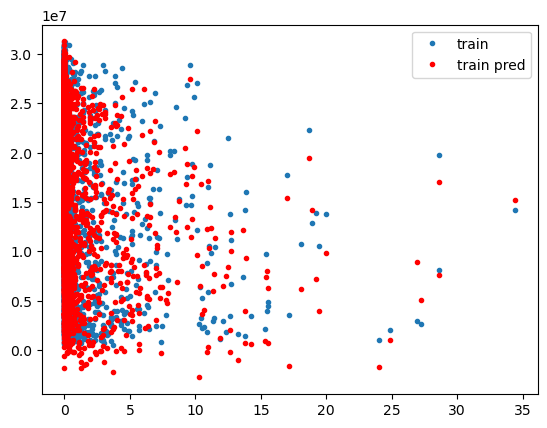

Model: -2409149.2610517377
{'select__k': 75, 'model__alpha': 0.17433288221999882}
Results of the best estimator of Pipeline
RMSE train: 3257805.20	RMSE test: 3095921.14
MAE train: 2320591.77	MAE test: 2234624.56


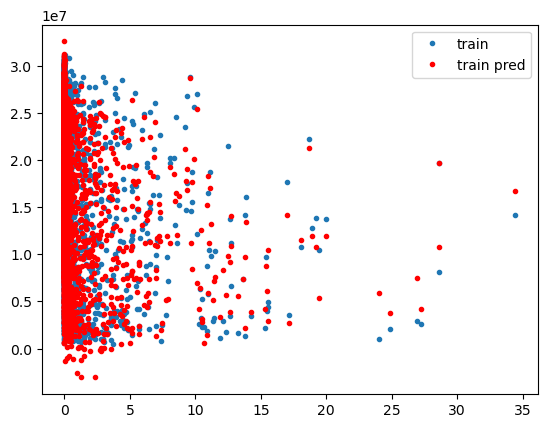

Model: -2826890.3897810644
{'select__k': 30, 'model__l1_ratio': 0.8974358974358974, 'model__alpha': 4.0}
Results of the best estimator of Pipeline
RMSE train: 3758884.17	RMSE test: 3537148.86
MAE train: 2827209.45	MAE test: 2591816.58


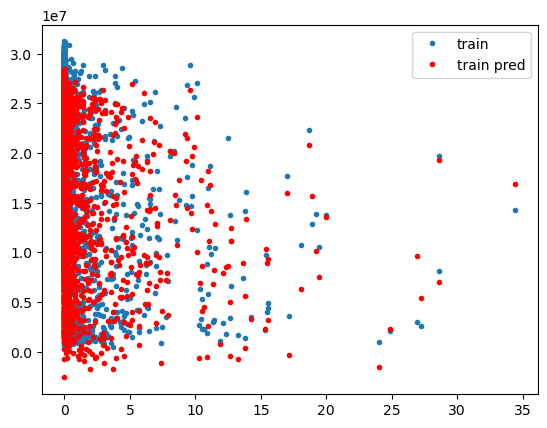

[0.7302348613739014, 0.696763277053833, 0.7148227691650391]
{'KNN_pred': [2995411.3954362, 3669004.351737694, 2105354.3342465754, 2589913.2328767125], 'KNN_select': [3386909.0476090116, 3394685.600663936, 2410845.287671233, 2420543.4246575343], 'RegTrees_pred': [0.0, 4413372.497795917, 0.0, 3136761.3698630137], 'RegTrees_select': [3483153.6109944335, 3691730.92222464, 2250097.479452055, 2489240.5479452056], 'LinearReg_pred': [3254352.6036904687, 3103586.448673973, 2321647.059703229, 2242422.3671082137], 'LinearReg_select': [3257805.1961352024, 3095921.136409502, 2320591.76837326, 2234624.5584775107]}
{'KNN_pred': 0.18954920768737793, 'KNN_select': 2.0830042362213135, 'RegTrees_pred': 0.6608903408050537, 'RegTrees_select': 7.55217170715332, 'LinearReg_pred': 0.1005866527557373, 'LinearReg_select': 0.696763277053833}
Number of selected features: 75
---------------------------------------------------
LINEAR REGRESSION SELECTED PARAMETERS best model is:

RandomizedSearchCV(cv=TimeSeriesSpl

In [253]:
np.random.seed(10)
budget = 15
n_splits = 5

all_scores = []

# ! Pipelines
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(f_regression)),
    ('model', Lasso(fit_intercept=True, tol=.5, random_state=10))
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(f_regression)),
    ('model', Ridge(fit_intercept=True, tol=.5, random_state=10))
])

pipeline_elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(f_regression)),
    ('model', ElasticNet(fit_intercept=True, tol=.5, random_state=10))
])

# ! Parameter grids
param_grid_lasso = {'model__alpha': np.logspace(-2, 1, 30),
              'select__k': list(range(1, X_train.shape[1]+1))}

pram_grid_ridge = {'model__alpha': np.logspace(-2, 1, 30),
              'select__k': list(range(1, X_train.shape[1]+1))}

param_grid_elastic = {'model__alpha': np.logspace(2.0, 3.0, num=4, base=2.0),
                'model__l1_ratio': np.linspace(0, 1, 40),
                'select__k': list(range(1, X_train.shape[1]+1))}

# ! If we want to use random values for the parameters -> unconsistency in the results
regr_lasso = RandomizedSearchCV(pipeline_lasso,
                                param_grid_lasso,
                                scoring='neg_mean_absolute_error',
                                cv=TimeSeriesSplit(),
                                n_iter=budget,
                                )

regr_ridge = RandomizedSearchCV(pipeline_ridge,
                                pram_grid_ridge,
                                scoring='neg_mean_absolute_error',
                                cv=TimeSeriesSplit(),
                                n_iter=budget,
                                )

regr_elastic = RandomizedSearchCV(pipeline_elastic,
                                  param_grid_elastic,
                                  scoring='neg_mean_absolute_error',
                                  cv=TimeSeriesSplit(),
                                  n_iter=budget,
                                  )

regr = [regr_lasso, regr_ridge, regr_elastic]


ln_reg_time = []

for i in regr:
    start_time = time.time()
    i.fit(X=X_train,y=y_train)
    print(f"Model: {i.best_score_}")
    print(i.best_params_)
    # Now we reevaluate the model on the test set to obtain more accurate results
    all_scores.append(train_and_test(i.best_estimator_, X_train, y_train, X_test, y_test))
    ln_reg_time.append(time.time() - start_time)
    
print(ln_reg_time)

# Select the best model (based on the MAE)
max_score = min(all_scores, key=lambda x: x[3])  # Best model is the one that minimizes the MAE
best_regr = regr[all_scores.index(max_score)]
total_time = ln_reg_time[all_scores.index(max_score)]
 
results['LinearReg_select'] = max_score
print(results)
times['LinearReg_select'] = total_time
print(times)
# print number of selected features
print(f"Number of selected features: {best_regr.best_estimator_.named_steps['select'].get_support().sum()}")

print_results("LINEAR REGRESSION SELECTED PARAMETERS", best_regr, max_score, total_time)


To be observed, the selected model, Ridge, does not delete any of the attributes (as expected, as it is one of its flaws), but some of their weights are close to zero, so we can consider that they are not relevant for the model.

On the other hand, the Lasso model and the ElasticNet model, do delete some of the attributes, but the results are worse than the Ridge model, so we will not consider them.

## 5.4. Results

In [254]:
np.random.seed(10)

# ! Obtain best, worst, fastest and slowest model
max_score = max(results.values(), key=lambda x: x[3])  # We determine the best model based on the MAE obtained in the test set (thus, excluding overfitting)
min_score = min(results.values(), key=lambda x: x[3])
# Obtain the key name of the best and worst model
max_time = max(times.values(), key=lambda x: x)
min_time = min(times.values(), key=lambda x: x)

best_model = list(results.keys())[list(results.values()).index(min_score)]
worst_model = list(results.keys())[list(results.values()).index(max_score)]
fastest_model = list(times.keys())[list(times.values()).index(min_time)]
slowest_model = list(times.keys())[list(times.values()).index(max_time)]

print(f"Best model: {best_model} with score {min_score} and time {list(times.values())[list(results.values()).index(min_score)]}s")
print(f"Worst model: {worst_model} with score {max_score} and time {list(times.values())[list(results.values()).index(max_score)]}s")
print(f"Fastest model: {fastest_model} with score {list(results.values())[list(times.values()).index(min_time)]} and time {min_time}s")
print(f"Slowest model: {slowest_model} with score {list(results.values())[list(times.values()).index(max_time)]} and time {max_time}s")


# ! Average (test MAE) score of the models
avg_score = 0
avg_time = 0

for key, value in results.items():
    avg_score += results[key][3]
    avg_time += times[key]

print(f"\nAverage models score: {abs(avg_score/len(results))}")
print(f"Average models time: {avg_time/len(times)}\n")


# ! Differences
print("The score difference between the best and worst model is: ", abs(max_score[3] - min_score)[3])  # test MAE
print("The score difference between the best and fastest model is: ", abs(min_score[3] - list(results.values())[list(times.values()).index(min_time)])[3])  # test MAE
print("The time difference between the best and fastest model model is: ", abs(list(times.values())[list(results.values()).index(min_score)] - min_time))
print("The time difference between the fastest and slowest model is: ", abs(max_time - min_time))

Best model: LinearReg_select with score [3257805.1961352024, 3095921.136409502, 2320591.76837326, 2234624.5584775107] and time 0.696763277053833s
Worst model: RegTrees_pred with score [0.0, 4413372.497795917, 0.0, 3136761.3698630137] and time 0.6608903408050537s
Fastest model: LinearReg_pred with score [3254352.6036904687, 3103586.448673973, 2321647.059703229, 2242422.3671082137] and time 0.1005866527557373s
Slowest model: RegTrees_select with score [3483153.6109944335, 3691730.92222464, 2250097.479452055, 2489240.5479452056] and time 7.55217170715332s

Average models score: 2518917.5834880318
Average models time: 1.880494236946106

The score difference between the best and worst model is:  902136.811385503
The score difference between the best and fastest model is:  7797.808630703017
The time difference between the best and fastest model model is:  0.5961766242980957
The time difference between the fastest and slowest model is:  7.451585054397583


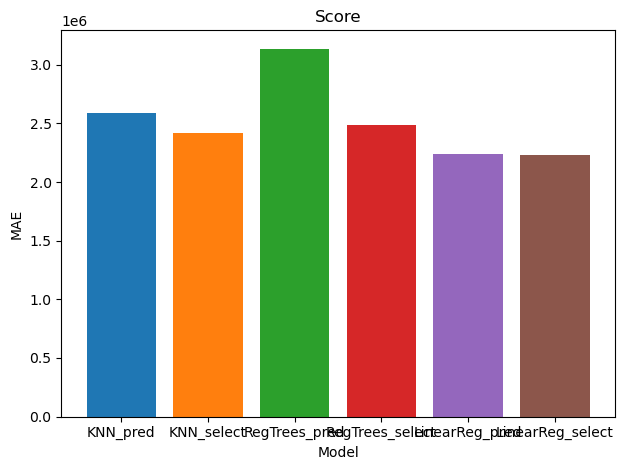

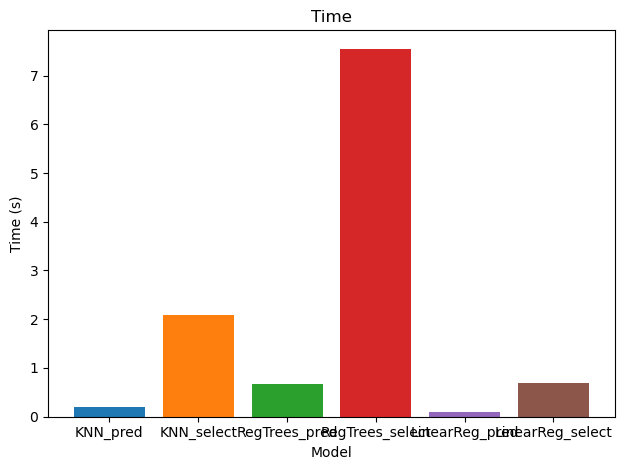

In [255]:
# ! Plot the score
for key, value in results.items():
    plt.bar(key, abs(value[3]))
plt.title('Score')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.tight_layout()

# Exporting image as png to ../data/img folder 
plt.savefig("../data/img/basic_methods_score.png")
plt.show()

# ! Plot the time
for key, value in times.items():
    plt.bar(key, value)
plt.title('Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.tight_layout()

# Exporting image as png to ../data/img folder - easier to visualize the annotations, better resolution
plt.savefig("../data/img/basic_methods_time.png")
plt.show()

## 5.5. Conclusions: 

After computig the models we can see that the best model in terms of MAE is the LinearReg_selected, but the best timing model is LinearReg_pred.

***Obtener algunas conclusiones, tales como: ¿cuál es el mejor método? ¿Cuál de los métodos 
básicos de aprendizaje automático es más rápido? ¿Los resultados son mejores que los 
regresores triviales/naive/baseline? ¿El ajuste de hiperparámetros mejora con respecto a los 
valores por omisión? ¿Hay algún equilibrio entre tiempo de ejecución y mejora de 
resultados? Etc***



# 6. Reducing Dimensionality
>¿Es posible reducir la dimensionalidad del problema?

Yes, it is possible to reduce the problem dimensionality, and as stated throughout the EDA, there are a lot of attributes that are highly correlated, so we can reduce the dimensionality of the problem by removing some of the attributes. Thus, it is recommended to use a PCA to reduce the dimensionality of the problem.

# X. Output the Jupyter Notebook as an HTML file

In [258]:
import os

# Export the notebook to HTML
os.system('jupyter nbconvert --to html model.ipynb --output ../data/html/model.html')
print("Notebook exported to HTML")


[NbConvertApp] Converting notebook model.ipynb to html


Notebook exported to HTML


[NbConvertApp] Writing 5920875 bytes to ../data/html/model.html
